# Importations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install seaborn
# !pip install matplotlib --user
# !pip install numpy
# !pip install xgboost --user
# !pip install tensorflow
# !pip install protobuf
# !pip install gradio
# !pip install xgboost
# !pip install xgboost-gpu
# !pip install missingno
# !pip install tensorflow-gpu
# !pip install torch
import xgboost as xgb

### Manipulation et nettoyage des données

In [ ]:
import os

In [ ]:
import sys
in_colab = 'google.colab' in sys.modules

if (in_colab):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

### Exploration et visualisation des données

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns

### Modélisation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Séparation des données et validation croisées

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

### Evaluation des modèles

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

### Optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

### Réseau neuronaux

In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, datascience, fastai, geemap, imgaug, lida, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


In [ ]:
import missingno as msno
from IPython.display import Markdown, display
import pandas as pd

In [ ]:
# -- cette fonction permet d'afficher du markdown dans la réponse de l'exécution d'un code
def markdown(string):
    display(Markdown(string))


# -- cette fonction permet d'afficher les informations complètes d'un dataframe
def show_informations(df, title):
    markdown(f'*** {title} ***')
    print("Total: {} enregistrements pour {} variables".format(df.shape[0],df.shape[1]))
    print(df.columns)
    print(df.info(verbose= True, show_counts=True))
    msno.bar(df)

In [ ]:
import pandas as pd
def loadCSV(filename, nrows=None):
  return pd.read_csv(filename, nrows=nrows)

def loadAllCSVs(directory):
  dataframes = {}
  for entry in os.scandir(directory):
    if entry.is_file() and entry.name.endswith('.csv'):
      df_name = entry.name.replace('.csv', '')
      dataframes[df_name] = loadCSV(entry.path)
  return dataframes

In [ ]:
# # # Charger les données
# patients_df = loadCSV('/content/drive/MyDrive/datas/PATIENTS.csv', 2000)
# admissions_df = loadCSV('/content/drive/MyDrive/datas/ADMISSIONS.csv')
# d_items_df = loadCSV('/content/drive/MyDrive/datas/D_ITEMS.csv')
# diagnoses_df = loadCSV('/content/drive/MyDrive/datas/DIAGNOSES_ICD.csv')
# #procedures_df = loadCSV('/content/drive/MyDrive/datas/procedures_icd.csv')
# noteevents_df = loadCSV('/content/drive/MyDrive/datas/NOTEEVENTS.csv')
# print(noteevents_df.shape)

# # Préparer la liste des subject_id des patients
# selected_subject_ids = patients_df['SUBJECT_ID']
# patients_ids = patients_df['SUBJECT_ID'].tolist()
# selected_diagnoses_df = diagnoses_df[diagnoses_df['SUBJECT_ID'].isin(selected_subject_ids)]

# sample_ids = [22532, 13702, 13702]
# print("Nombre d'occurrences dans noteevents_df:", noteevents_df[noteevents_df['SUBJECT_ID'].isin(sample_ids)].shape[0])
# print("Nombre d'occurrences dans patients:", patients_df[patients_df['SUBJECT_ID'].isin(sample_ids)].shape[0])

# common_ids = set(selected_subject_ids).intersection(set(noteevents_df['SUBJECT_ID']))
# print("Nombre de SUBJECT_ID communs:", len(common_ids))
# print(patients_df['SUBJECT_ID'].dtype)
# print(noteevents_df['SUBJECT_ID'].dtype)

# # Convertir les SUBJECT_ID en noteevents_df au même type que dans patients_df
# noteevents_df['SUBJECT_ID'] = noteevents_df['SUBJECT_ID'].astype(patients_df['SUBJECT_ID'].dtype)


# noteevents_df = noteevents_df[noteevents_df['SUBJECT_ID'].isin(selected_subject_ids)]
# noteevents_df['TEXT'] = noteevents_df['TEXT'].str.lower()
# print(noteevents_df.shape)
# #selected_procedures_df = procedures_df[procedures_df['subject_id'].isin(selected_subject_ids)]

# # Définir les termes de recherche pour les arythmies
# arythmia_terms = ['tachycardia', 'bradycardia', 'atrial fibrillation', 'ventricular fibrillation', 'heart block', 'PVCs']

# # Filtrer noteevents_df pour les notes contenant des termes d'arythmie
# arythmia_notes = noteevents_df[noteevents_df['TEXT'].str.contains('|'.join(arythmia_terms), na=False)]

In [ ]:
# print(noteevents_df.shape)
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# # # Charger les données de chartevents.csv en morceaux, filtrées pour les patients
# chunksize = 10 ** 6
# filtered_chunks = []

# for chunk in pd.read_csv('/content/drive/MyDrive/datas/CHARTEVENTS.csv', chunksize=chunksize):
#     filtered_chunk = chunk[chunk['SUBJECT_ID'].isin(patients_ids)]
#     filtered_chunks.append(filtered_chunk)

In [ ]:
# chartevents_df = pd.concat(filtered_chunks, ignore_index=True)

# # Jointure entre admissions et patients pour sélectionner les derniers patients
# admissions_patients_df = pd.merge(admissions_df, patients_df, on='SUBJECT_ID')
# selection_patients_df = (admissions_patients_df
#                          .drop_duplicates(subset='SUBJECT_ID')
#                          .sort_values('SUBJECT_ID', ascending=False)
#                          .head(5000))

# # Préparation de la hauteur et du poids
# height_weight_df = chartevents_df[chartevents_df['ITEMID'].isin([226730, 226512])]
# height_weight_df['ITEMID'] = height_weight_df['ITEMID'].astype(str)  # Conversion de itemid en chaîne
# height_weight_df['HEIGHT'] = height_weight_df.apply(lambda x: x['VALUENUM'] if x['ITEMID'] == '226730' else None, axis=1)
# height_weight_df['WEIGHT'] = height_weight_df.apply(lambda x: x['VALUENUM'] if x['ITEMID'] == '226512' else None, axis=1)

# height_weight_agg = (height_weight_df
#                      .groupby('SUBJECT_ID')
#                      .agg({'HEIGHT': 'max', 'WEIGHT': 'max'})
#                      .reset_index())

# # Jointure pour les informations démographiques des patients avec taille et poids
# patients_hw_df = pd.merge(selection_patients_df, height_weight_agg, on='SUBJECT_ID', how='left')

# print(patients_df.columns)  # Après le chargement du fichier CSV des patients
# print(admissions_patients_df.columns)  # Après la jointure avec admissions
# print(patients_hw_df.columns)

In [ ]:
# # Convertir 'DOB' et 'ADMITTIME' en datetime, en gérant les erreurs potentielles
# patients_hw_df['DOB'] = pd.to_datetime(patients_hw_df['DOB'], errors='coerce')
# patients_hw_df['ADMITTIME'] = pd.to_datetime(patients_hw_df['ADMITTIME'], errors='coerce')

# # Calculer l'âge au moment de l'admission
# patients_hw_df['AGE_AT_ADMISSION'] = patients_hw_df['ADMITTIME'].dt.year - patients_hw_df['DOB'].dt.year

# # Calculer l'ajustement pour les anniversaires
# adjustment = (patients_hw_df['ADMITTIME'].dt.month < patients_hw_df['DOB'].dt.month) | \
#              ((patients_hw_df['ADMITTIME'].dt.month == patients_hw_df['DOB'].dt.month) & \
#               (patients_hw_df['ADMITTIME'].dt.day < patients_hw_df['DOB'].dt.day))

# # Appliquer l'ajustement
# patients_hw_df['AGE_AT_ADMISSION'] -= adjustment.astype(int)

# # Si également besoin de convertir 'DOD' (Date Of Death) en datetime
# patients_hw_df['DOD'] = pd.to_datetime(patients_hw_df['DOD'], errors='coerce')

# # on peut maintenant afficher ou utiliser la colonne 'AGE_AT_ADMISSION' pour plus d'analyses
# print(patients_hw_df[['DOB', 'ADMITTIME', 'AGE_AT_ADMISSION']])



In [ ]:
# patients_df.columns = [col.lower() for col in patients_df.columns]
# patients_hw_df.columns = [col.lower() for col in patients_hw_df.columns]
# chartevents_df.columns = [col.lower() for col in chartevents_df.columns]
# noteevents_df.columns = [col.lower() for col in noteevents_df.columns]
# d_items_df.columns = [col.lower() for col in d_items_df.columns]
# diagnoses_df.columns = [col.lower() for col in diagnoses_df.columns]
# admissions_df.columns = [col.lower() for col in admissions_df.columns]
# admissions_patients_df.columns = [col.lower() for col in admissions_patients_df.columns]
# selection_patients_df.columns = [col.lower() for col in selection_patients_df.columns]
# selected_diagnoses_df.columns = [col.lower() for col in selected_diagnoses_df.columns]
# arythmia_notes.columns = [col.lower() for col in arythmia_notes.columns]

In [ ]:
# # Filtrer d_items pour les paramètres vitaux d'intérêt
# labels_of_interest = ['spo2', 'heart rate', 'respiratory rate', 'systolic', 'diastolic', 'temperature', 'ventilation']
# # S'Assurez que 'label' ne contient que des chaînes
# d_items_df['label'] = d_items_df['label'].fillna('').astype(str)

# # Filtrer d_items pour les paramètres vitaux d'intérêt
# labels_of_interest = ['spo2', 'heart rate', 'respiratory rate', 'systolic', 'diastolic', 'temperature', 'ventilation']
# filtered_d_items_df = d_items_df[d_items_df['label'].str.lower().apply(lambda x: any(label in x for label in labels_of_interest) if isinstance(x, str) else False)]

# #filtered_d_items_df = d_items_df[d_items_df['label'].str.lower().apply(lambda x: any(label in x for label in labels_of_interest))]

# # Jointure entre chartevents et d_items filtrés
# ce_di_df = pd.merge(chartevents_df, filtered_d_items_df, on='itemid')

# # Filtrer pour les patients sélectionnés
# final_df = ce_di_df[ce_di_df['subject_id'].isin(selection_patients_df['subject_id'])]
# final_df = final_df[['subject_id', 'hadm_id', 'charttime', 'itemid', 'label', 'value', 'valuenum', 'valueuom']]

# # Préparation de la jointure finale en incluant 'age_at_admission'
# complete_df = pd.merge(patients_hw_df[['subject_id', 'gender', 'age_at_admission', 'height', 'weight', 'admittime', 'dod', 'dischtime', 'deathtime']],
#                        final_df, on='subject_id', how='left')

# # Fusionner les diagnostics avec complete_df
# complete_df = pd.merge(complete_df, selected_diagnoses_df, on=['subject_id', 'hadm_id'], how='left')

# # Fusionner les procédures avec complete_df
# #complete_df = pd.merge(complete_df, selected_procedures_df, on=['subject_id', 'hadm_id'], how='left')

In [ ]:
# arythmia_notes.sample(5)

In [ ]:
# # Vérification du chargement des données
# print("Note Events Loaded:", noteevents_df.shape)
# print("Sample Notes:", noteevents_df['text'].head())

# # Vérifier si des notes correspondantes sont trouvées
# print("Matching Notes Found:", arythmia_notes.shape)

# # Imprimez quelques notes correspondantes pour vérifier
# print(arythmia_notes[['subject_id', 'text']].head())

# # Extraction des informations de complication
# # Initialiser les colonnes pour les complications
# complete_df['complication'] = 0
# complete_df['date_complication'] = None
# complete_df['type_complication'] = None

# # Mettre à jour complete_df avec des informations de complications
# for _, note_row in arythmia_notes.iterrows():
#     subject_id = note_row['subject_id']
#     chartdate = note_row['chartdate']
#     text = note_row['text'].lower()

#     # Trouver le type de complication basé sur les termes de recherche
#     complication_found = False
#     for term in arythmia_terms:
#         if term in text:
#             complication_found = True
#             idx = complete_df['subject_id'] == subject_id
#             complete_df.loc[idx, 'complication'] = 1
#             complete_df.loc[idx, 'date_complication'] = chartdate
#             complete_df.loc[idx, 'type_complication'] = term
#             break  # Sortir dès la première correspondance trouvée

#     # Debug: Imprimer si une complication est trouvée pour un patient
#     if complication_found:
#         print(f"Complication found for subject {subject_id}: {term}")

# # Imprimez le nombre de complications détectées
# print("Total complications found:", complete_df['complication'].sum())


In [ ]:
# show_informations(complete_df, 'analyse du dataframe image')

In [ ]:
# # # # Importation des bibliothèques nécessaires
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # # # 1. Chargement du dataset
# complete_df.to_csv('/content/drive/MyDrive/datas/complete_df.csv', index=False)

In [ ]:
# df = loadCSV("/content/drive/MyDrive/datas/complete_df.csv")

In [ ]:
# import pandas as pd

# # Conversion de 'charttime' de date en datetime
# df['charttime'] = pd.to_datetime(complete_df['charttime'])

# # Décalage des dates de 100 ans dans le passé, si nécessaire
# def adjust_date(date):
#     return date - pd.DateOffset(years=100) if pd.notnull(date) else date

# df['charttime'] = complete_df['charttime'].apply(adjust_date)

# # Création du dictionnaire de mappage pour le genre
# gender_map = {'M': 1, 'F': 0}

# # Application du mappage à la colonne 'gender'
# df['gender'] = complete_df['gender'].map(gender_map)

# # Affichage pour vérifier les modifications
# print(complete_df.head())


In [ ]:
# # Conversion des colonnes de date en datetime
# for col in ['dod', 'admittime', 'dischtime', 'charttime']:
#     df[col] = pd.to_datetime(df[col])

# # Décalage des dates de 100 ans dans le passé
# def adjust_date(date):
#     return date - pd.DateOffset(years=100) if pd.notnull(date) else date

# for col in ['dod', 'admittime', 'dischtime', 'charttime']:
#     df[col] = df[col].apply(adjust_date)

# # Création du dictionnaire de mappage
# gender_map = {'M': 1, 'F': 0}

# # Application du mappage à la colonne 'gender'
# df['gender'] = df['gender'].map(gender_map)

# # Affichage pour vérifier les modifications
# print(df.head())

In [ ]:
# df.to_csv('/content/drive/MyDrive/datas/df.csv', index=False)

In [ ]:
driver_path = './data/'
if (in_colab):
    driver_path = '/content/drive/MyDrive/datas/'

*** analyse du dataframe image ***

Total: 23970261 enregistrements pour 25 variables
Index(['subject_id', 'gender', 'age_at_admission', 'height', 'weight',
       'admittime', 'dod', 'dischtime', 'deathtime', 'hadm_id', 'charttime',
       'itemid', 'label', 'value', 'valuenum', 'valueuom', 'row_id', 'seq_num',
       'icd9_code', 'complication', 'date_complication', 'type_complication',
       'delay_hours', 'hours_since_admission', 'length_of_stay'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970261 entries, 0 to 23970260
Data columns (total 25 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   subject_id             23970261 non-null  int64  
 1   gender                 23970261 non-null  int64  
 2   age_at_admission       23970261 non-null  int64  
 3   height                 2162891 non-null   float64
 4   weight                 2861029 non-null   float64
 5   admittime              23970261 non-null  object 
 

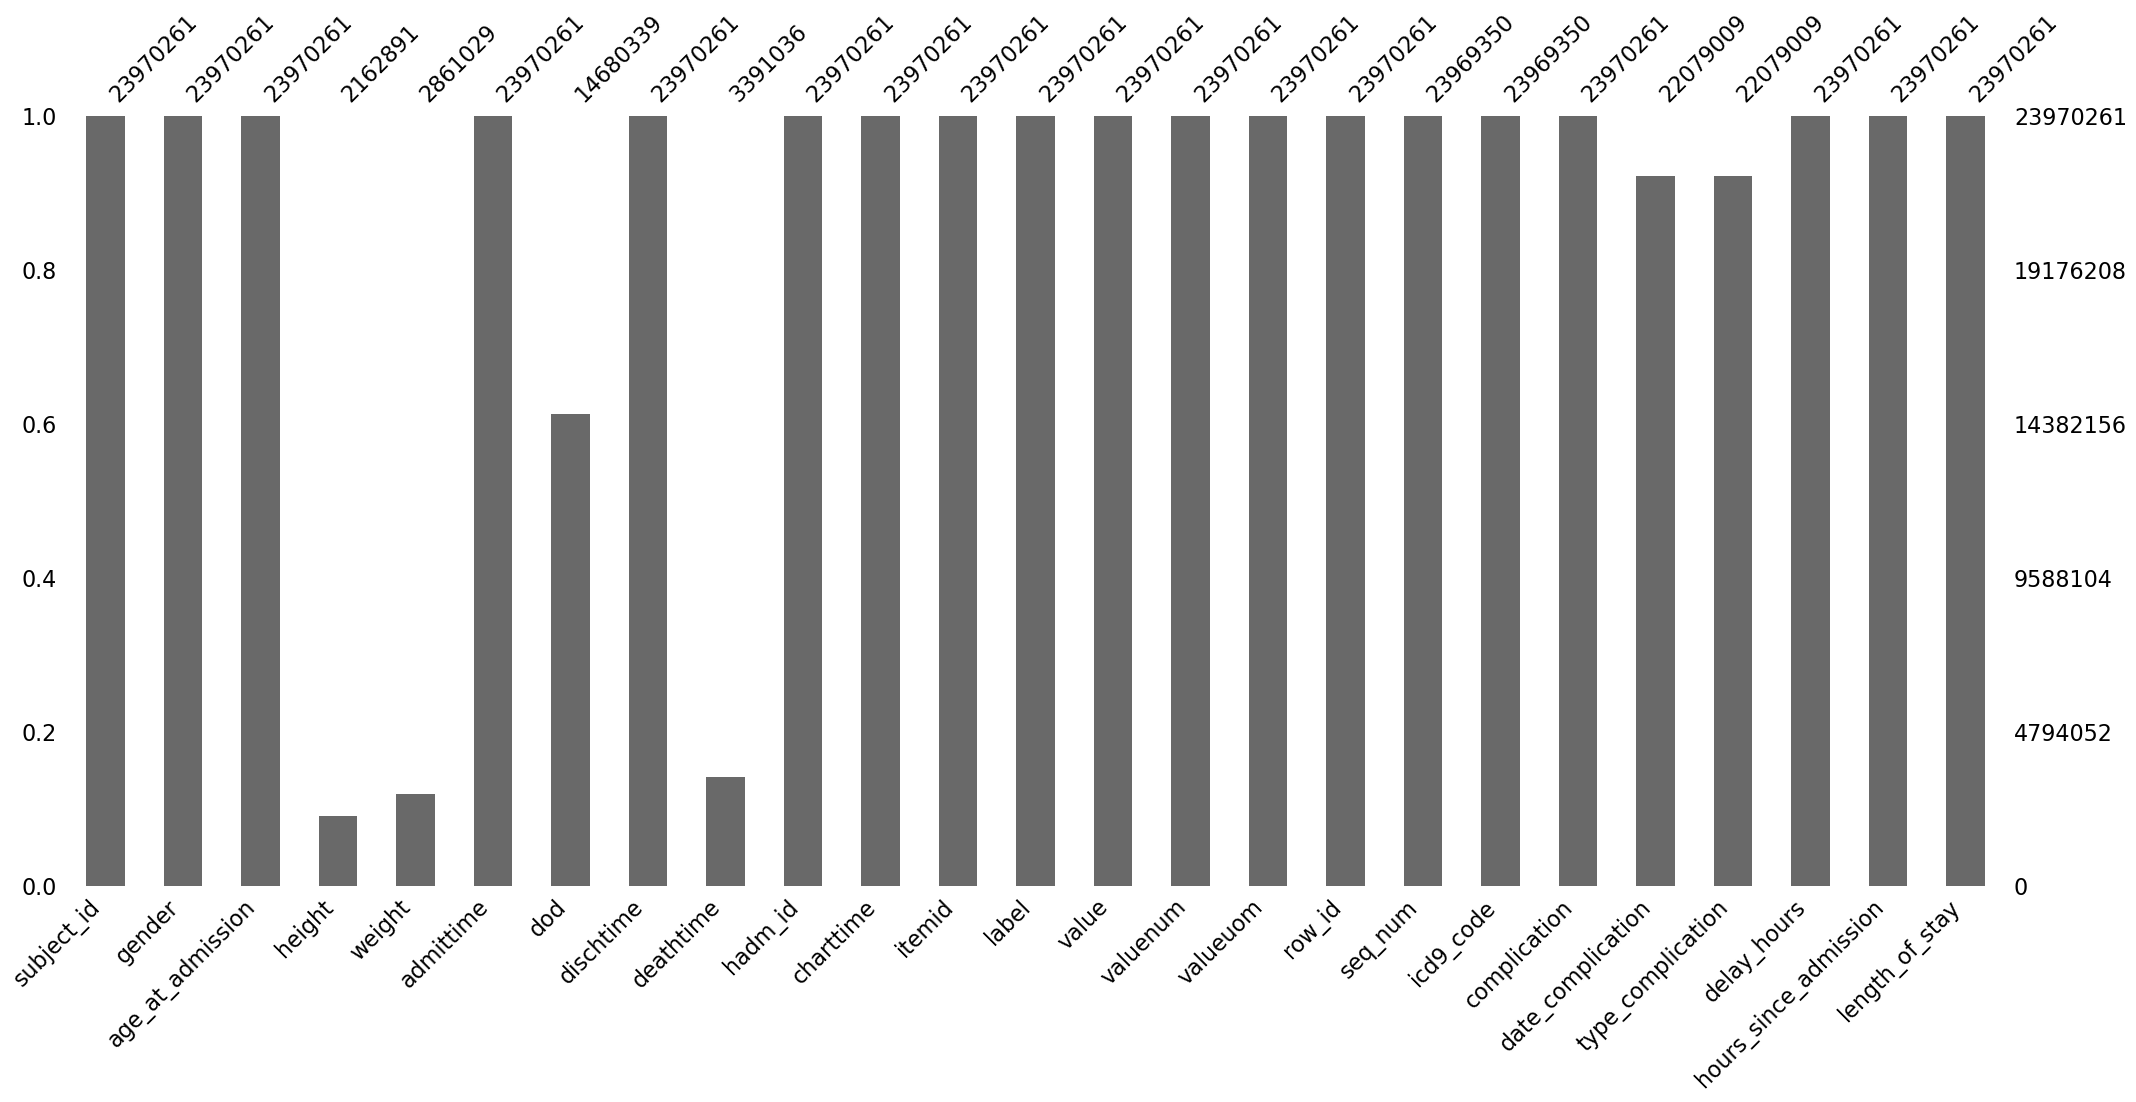

In [ ]:
df = loadCSV(driver_path + 'df.csv')
show_informations(df, 'analyse du dataframe image')

Etant donné le peu de données avec Taille et poids (moins de 10%) il faut trouver un moyen d'extrapoler ces informations.

Etant donnée que la physiologie des patients est unique , on peut cependant imaginer créer des groupes par tranche d'age et sexe.
En effet, les femmes sont généralement plus petite que les hommes,
la taille varie également selon la tranche d'age, croissance lors de l'enfance et de l'adolescence et perte de taille après 60 ans.
Concernant le poids, c'est un autre problème. Cependant, étant donné qu'il s'agit ici d'un POC, on se contentera de prendre la moyenne des poids en fonction des tranches d'age et de sexe, comme pour la taille.
Il sera possible d'envisagé par la suite des recherches sur l'anamnèse des patients afin de détecter des informations comme par exemple l'IMC, ou l'obésiter, etc.

*** analyse du dataframe image ***

Total: 23970261 enregistrements pour 26 variables
Index(['subject_id', 'gender', 'age_at_admission', 'height', 'weight',
       'admittime', 'dod', 'dischtime', 'deathtime', 'hadm_id', 'charttime',
       'itemid', 'label', 'value', 'valuenum', 'valueuom', 'row_id', 'seq_num',
       'icd9_code', 'complication', 'date_complication', 'type_complication',
       'delay_hours', 'hours_since_admission', 'length_of_stay', 'age_group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970261 entries, 0 to 23970260
Data columns (total 26 columns):
 #   Column                 Non-Null Count     Dtype   
---  ------                 --------------     -----   
 0   subject_id             23970261 non-null  int64   
 1   gender                 23970261 non-null  int64   
 2   age_at_admission       23970261 non-null  int64   
 3   height                 21574447 non-null  float64 
 4   weight                 21574447 non-null  float64 
 5   admittime              23970261

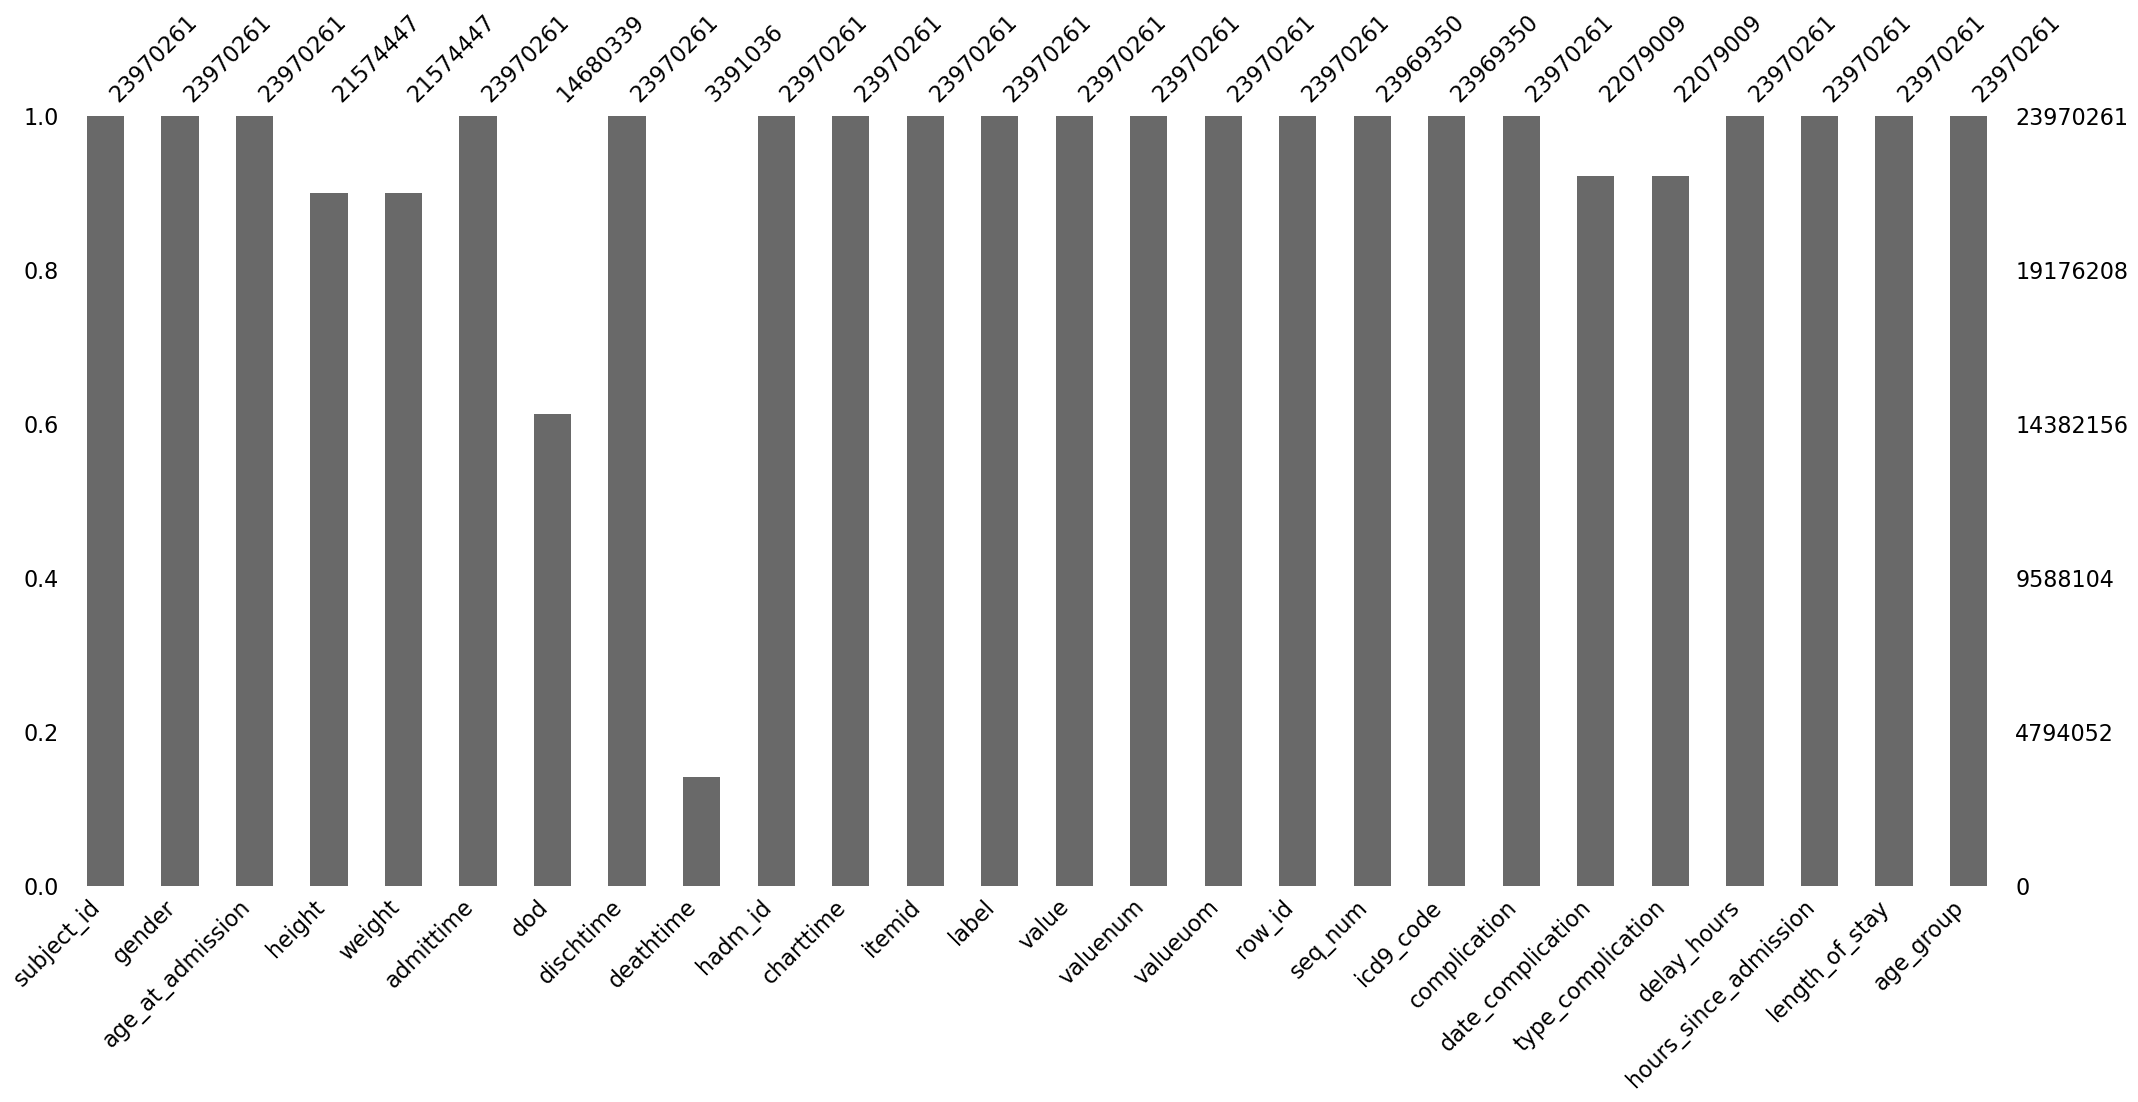

In [ ]:
from sklearn.impute import SimpleImputer

# Définir des tranches d'âge
bins = [0, 12,18,60,125]
labels = ['0-12', '13-18', '19-60', '61-125']
df['age_group'] = pd.cut(df['age_at_admission'], bins=bins, labels=labels, right=False)

# Grouper par sexe et tranche d'âge
grouped = df.groupby(['gender', 'age_group'])

# Fonction pour remplir les valeurs manquantes par la moyenne du groupe
def fill_with_group_mean(df, cols):
    for col in cols:
        df[col] = df.groupby(['gender', 'age_group'])[col].transform(lambda x: x.fillna(x.mean()))
    return df

# Colonnes à traiter
columns_to_impute = ['height', 'weight']

# Appliquer la fonction
df = fill_with_group_mean(df, columns_to_impute)

show_informations(df, 'analyse du dataframe image')

In [ ]:
#df.to_csv(driver_path + 'df_taillePoids.csv', index=False)
df = loadCSV(driver_path + 'df_taillePoids.csv')

*** analyse du dataframe taille poids ***

Total: 23970261 enregistrements pour 26 variables
Index(['subject_id', 'gender', 'age_at_admission', 'height', 'weight',
       'admittime', 'dod', 'dischtime', 'deathtime', 'hadm_id', 'charttime',
       'itemid', 'label', 'value', 'valuenum', 'valueuom', 'row_id', 'seq_num',
       'icd9_code', 'complication', 'date_complication', 'type_complication',
       'delay_hours', 'hours_since_admission', 'length_of_stay', 'age_group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970261 entries, 0 to 23970260
Data columns (total 26 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   subject_id             23970261 non-null  int64  
 1   gender                 23970261 non-null  int64  
 2   age_at_admission       23970261 non-null  int64  
 3   height                 21574447 non-null  float64
 4   weight                 21574447 non-null  float64
 5   admittime              23970261 non-nu

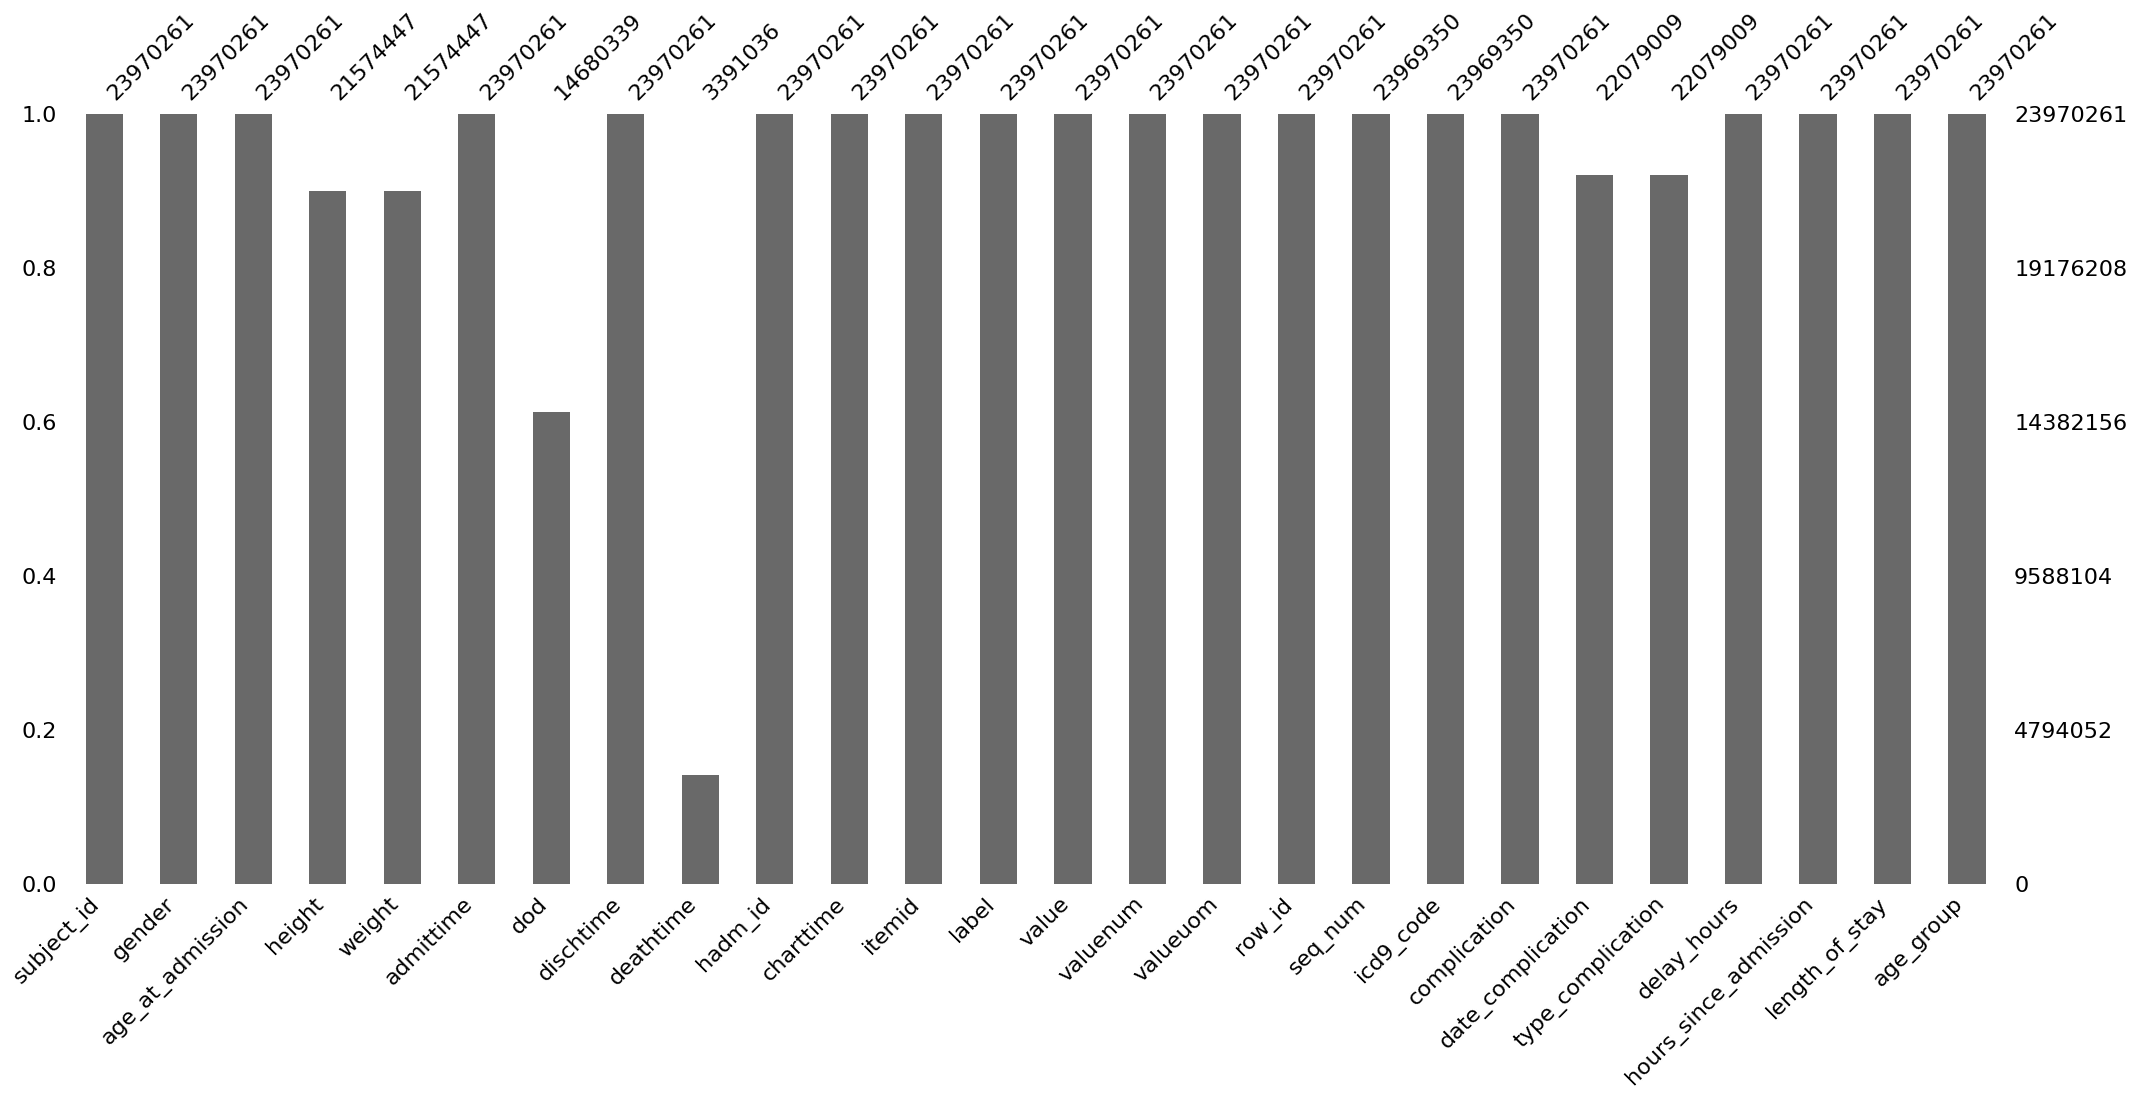

In [ ]:
show_informations(df, 'analyse du dataframe taille poids')

In [ ]:
complication_gender_1 = df[df['gender'] == 1]
complication_gender_0 = df[df['gender'] == 0]

nb_complications_gender_1_1 = len(complication_gender_1[complication_gender_1['complication'] == 1])
nb_complications_gender_1_0 = len(complication_gender_1[complication_gender_1['complication'] == 0])
nb_complications_gender_0_1 = len(complication_gender_0[complication_gender_0['complication'] == 1])
nb_complications_gender_0_0 = len(complication_gender_0[complication_gender_0['complication'] == 0])

dfNoNan = df[df['height'].notna() & df["weight"].notna()]

print("Nombre de complications pour les femmes ", nb_complications_gender_1_1, " / ", len(df))
print("Nombre de complications pour les hommes ", nb_complications_gender_0_1, " / ", len(df))
print("nb record avec taille et poids renseigné", len(dfNoNan), " / ", len(df))

cp_nonan_1 = dfNoNan[dfNoNan['gender'] == 1]
cp_nonan_0 = dfNoNan[dfNoNan['gender'] == 0]

cp_nonan_1_1 = len(cp_nonan_1[cp_nonan_1['complication'] == 1])
cp_nonan_0_1 = len(cp_nonan_0[cp_nonan_0['complication'] == 0])

print('nb complication pour les hommes', cp_nonan_1_1)
print('nb complication pour les femmes', cp_nonan_0_1)

Nombre de complications pour les femmes  13352705  /  23970261
Nombre de complications pour les hommes  8726304  /  23970261
nb record avec taille et poids renseigné 21574447  /  23970261
nb complication pour les hommes 12177010
nb complication pour les femmes 822639


In [ ]:

# # # 1-bis. Convertir la colonne 'gender' en numérique si elle existe
# # if 'gender' in df.columns:
# #     df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# # 1-tiers. Exclure les colonnes non numériques lors du calcul de la corrélation
# # numeric_cols = df.select_dtypes(include=[float, int]).columns
# # date_cols = df.select_dtypes(include=['datetime']).columns
# # relevant_cols = [col for col in numeric_cols if col not in date_cols]
# # correlation_matrix = df[relevant_cols].corr()



# # # 2. Affichage des statistiques
# # print(df.describe())

# # # 3. Détermination du délai moyen
# # mean_delay = df['admittime'].mean()
# # print(f"Le délai moyen d'arrivée d'un arrêt cardiaque est de {mean_delay:.2f} heures.")




# # Sélection des colonnes numériques et date
# numeric_cols = df.select_dtypes(include=[float, int]).columns
# date_cols = df.select_dtypes(include=['datetime']).columns

# # Exclusion des colonnes date pour la matrice de corrélation
# relevant_cols = [col for col in numeric_cols if col not in date_cols]

# # Calcul de la matrice de corrélation pour les colonnes numériques pertinentes
# correlation_matrix = df[relevant_cols].corr()


# # Affichage de la matrice de corrélation
# print(correlation_matrix)


In [ ]:
# # S'assurer que 'admittime' est une colonne datetime
# # Il faut peut etre adapter cette partie en fonction de la colonne spécifique que l'on utilise pour représenter le délai
# df['admittime'] = pd.to_datetime(df['admittime'])


# # Calcul du délai moyen
# mean_delay = df['admittime'].mean()
# reference_time = df['admittime'].min()
# df['delay_hours'] = (df['admittime'] - reference_time).astype('timedelta64[h]')
# print("Le délai moyen d'arrivée d'un arrêt cardiaque est de {} heures.".format(mean_delay))

# # Comme 'admittime' est une date, on doit décider comment on veut calculer un "délai moyen" à partir des données disponibles.


In [ ]:
# df['charttime'] = pd.to_datetime(df['charttime'])
# df['hours_since_admission'] = (df['charttime'] - df['admittime']).dt.total_seconds() / 3600

In [ ]:
# df['dischtime'] = pd.to_datetime(df['dischtime'])
# df['deathtime'] = pd.to_datetime(df['deathtime'])
# df['date_complication'] = pd.to_datetime(df['date_complication'])
# df['dod'] = pd.to_datetime(df['dod'])
# print(df.info())

In [ ]:
# # 1. Nettoyage des données
# df['value'] = pd.to_numeric(df['value'], errors='coerce')
# df.dropna(subset=['value'], inplace=True)

# # 2. Réorganisation des données
# #df_pivot = df.pivot_table(index=['subject_id', 'hours_since_admission'], columns='arythmiastatus', values='value', aggfunc='mean').reset_index()

# # Convertir 'arythmiastatus' en une variable binaire
# # Supposons que 'arythmiastatus' contienne des valeurs telles que 'Arythmia' et 'No Arythmia'
# #df['complication'] = df['arythmiastatus'].apply(lambda x: 1 if x == 'Arythmia' else 0)

# # Affichage pour vérifier les modifications
# #print(df[['arythmiastatus', 'complication']].head())

In [ ]:
# for col in ['admittime', 'dischtime', 'dob', 'charttime']:
#     df[col] = pd.to_datetime(df[col])

# # Convertion des chaînes de caractères en catégories numériques (pour les variables catégorielles)
# df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Création de nouvelles caractéristiques

In [ ]:
# # # calcul de l'age au moment de l'admission
# # df['age_at_admission'] = (df['admittime'] - df['dob']).dt.total_seconds() / (3000 * 24 * 365.28)

# # calcul de la durée du séjour
# df['length_of_stay'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / (3000 * 24)

# # # Création de caractéristiques résumées pour les paramètres vitaux (par exemple, la moyenne quotidienne)
# # # au cas ou j'aurai besoin de besoin de regrouper mes données par 'subject_id' et par jour
# # # Puis calculer des statistiques comme la moyenne, le maximum, etc.
# # vital_params = ['spo2', 'Respiratory Rate', '']
# # df_daily = df.groupby(['subject_id', df['charttime'].dt.date])[vital_params].mean().reset_index()

# # # Jointure de ces résumés avec le DataFrame principal
# # df = df.merge(df_daily, on=['subject_id', 'charttime'], how='left')

In [ ]:
# df.describe()

In [ ]:
# df.sample(5)

In [ ]:
# # Calculer le nombre total de patients uniques
# total_patients = df['subject_id'].nunique()

# # Identifier les patients uniques avec au moins une complication
# unique_complications = df[df['complication'] == 1]['subject_id'].unique()
# complication_count = len(unique_complications)

# # Calculer la proportion de patients avec complications
# proportion_of_complications = complication_count / total_patients

# # Afficher les résultats
# print("Nombre de patients avec complications:", complication_count)
# print("Proportion de patients avec complications:", proportion_of_complications)

In [ ]:
# # Identifier les patients uniques avec un 'deathtime' non nul
# unique_deaths = df[df['deathtime'].notnull()]['subject_id'].unique()
# death_count = len(unique_deaths)

# # Calculer la proportion de décès
# proportion_of_deaths = death_count / total_patients

# # Afficher les résultats
# print("Nombre de patients décédés:", death_count)
# print("Proportion de patients décédés:", proportion_of_deaths)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df = df[df['age_at_admission'] <= 125]

# # Histogramme pour la distribution d'une caractéristique
# plt.figure(figsize=(10, 6))
# sns.histplot(df['age_at_admission'], bins=30, kde=True)
# plt.title('Distribution de l’âge au moment de l’admission')
# plt.xlabel('Âge')
# plt.ylabel('Nombre de patients')
# plt.show()

# # Diagramme en boîte pour comparer les distributions
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='gender', y='age_at_admission', data=df)
# plt.title('Distribution de l’âge par sexe')
# plt.xlabel('Sexe')
# plt.ylabel('Âge')
# plt.show()

# # Corrélation entre les caractéristiques
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Matrice de corrélation')
# plt.show()

In [ ]:
# df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [ ]:
# import numpy as np
# correlation_matrix = df.select_dtypes(include=[np.number]).corr()

In [ ]:
# print(df.nunique())

In [ ]:
# df_clean = df.dropna()

In [ ]:
# df = df.reset_index(drop=True)

In [ ]:
# df['admittime'] = pd.to_datetime(df['admittime'])
# df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')
# df['dod'] = pd.to_datetime(df['dod'], errors='coerce')
# df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')

# # Filtrer les enregistrements où 'deathtime' est non nul
# deaths_df = df[df['deathtime'].notnull()]

# # Sélectionner quelques exemples aléatoires, en incluant 'deathtime', 'dod', 'admittime', et 'charttime'
# example_deaths = deaths_df[['deathtime', 'dod', 'admittime', 'charttime']].sample(n=5)

# # Afficher les exemples
# print(example_deaths)

In [ ]:
def normalize_date(row, reference_column, target_column):
    assert isinstance(row[reference_column], pd.Timestamp), f"Reference column {reference_column} is not a datetime"
    assert isinstance(row[target_column], pd.Timestamp) or pd.isnull(row[target_column]), f"Target column {target_column} is not a datetime or NaT"

    if pd.notnull(row[target_column]):
        return row[reference_column].replace(hour=row[target_column].hour, minute=row[target_column].minute, second=row[target_column].second)
    else:
        return pd.NaT  # Retourne 'NaT' si la date cible est nulle



# # Mise à jour de 'dod', 'deathtime', et 'charttime' pour correspondre à l'année, mois et jour de 'admittime'
# df['dod'] = df.apply(lambda row: normalize_date(row, 'admittime', 'dod'), axis=1)
# df['deathtime'] = df.apply(lambda row: normalize_date(row, 'admittime', 'deathtime'), axis=1)
# df['charttime'] = df.apply(lambda row: normalize_date(row, 'admittime', 'charttime'), axis=1)
# df.to_csv('/content/drive/MyDrive/datas/df.csv', index=False)

In [ ]:
# df['date_complication'] = pd.to_datetime(df['date_complication'], errors='coerce')
# print(df['date_complication'].dtype)

In [ ]:
# df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')

In [ ]:
# df['date_complication'] = df.apply(lambda row: normalize_date(row, 'admittime', 'date_complication'), axis=1)

In [ ]:
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')
df['dod'] = pd.to_datetime(df['dod'], errors='coerce')
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')
df['date_complication'] = pd.to_datetime(df['date_complication'], errors='coerce')

In [ ]:
# df.to_csv('/content/drive/MyDrive/datas/df.csv', index=False)

In [ ]:
# # Trouver les cas où le 'deathtime' est avant 'admittime'
# inconsistencies = df[df['deathtime'] < df['admittime']]
# print(inconsistencies[['subject_id', 'admittime', 'deathtime']])

In [ ]:
# # on a des cas ou deathtime < admittime suite a la mise a l'échelle des dates,
# # on va donc ajouter une journée a ces cas et supposé que le décès a eu lieu le lendemain par défaut

# def adjust_deathtime(row):
#     print(type(row['deathtime']), type(row['admittime']))  # Ajoutez ceci pour déboguer
#     if pd.notnull(row['deathtime']) and row['deathtime'] < row['admittime']:
#         return row['deathtime'] + pd.Timedelta(days=1)
#     else:
#         return row['deathtime']

# # Appliquer la fonction pour ajuster deathtime
# df['deathtime'] = df.apply(adjust_deathtime, axis=1)

In [ ]:
# df.to_csv('/content/drive/MyDrive/datas/df.csv', index=False)

ADF Statistic: -4.671116
p-value: 0.000095


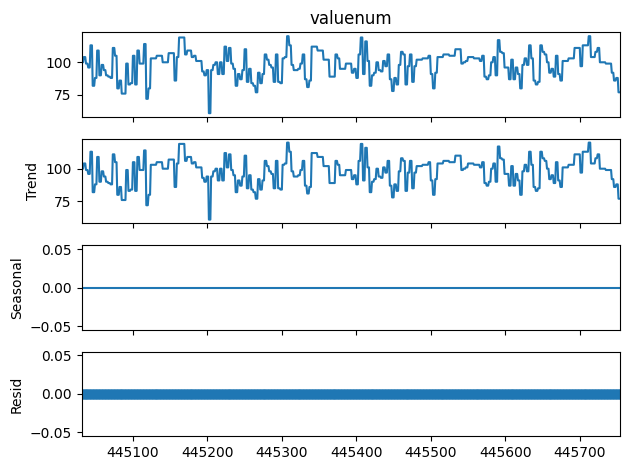

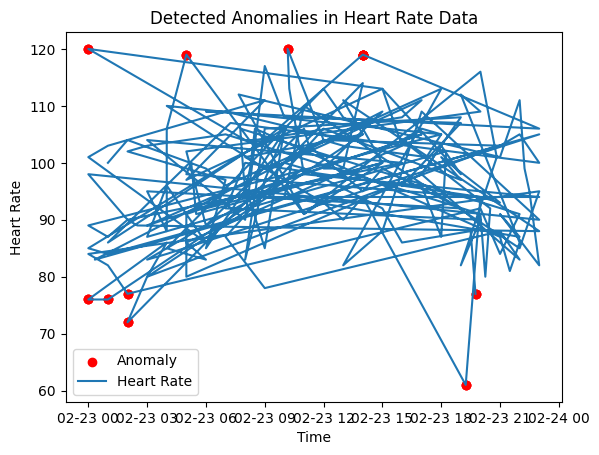

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Convertissez les colonnes de date en datetime si nécessaire
df['charttime'] = pd.to_datetime(df['charttime'])

# Filtrez les données pour un patient spécifique ayant une complication
patient_id = 3602  # Remplacez par l'ID du patient concerné
df_patient = df[(df['subject_id'] == patient_id) & (df['label'] == 'Heart Rate')]

# Vérifiez si la série est stationnaire
result = adfuller(df_patient['valuenum'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Décomposition saisonnière pour identifier les tendances et la saisonnalité
decomposition = seasonal_decompose(df_patient['valuenum'], model='additive', period=1)
decomposition.plot()
plt.show()

# Détecter les anomalies en utilisant la méthode de votre choix
# Exemple simple : calculer l'écart type et détecter les valeurs qui s'écartent de 2 écarts types
std_dev = df_patient['valuenum'].std()
mean_val = df_patient['valuenum'].mean()

df_patient['anomaly'] = df_patient['valuenum'].apply(lambda x: abs(x - mean_val) > 2 * std_dev)

# Visualiser les anomalies
plt.scatter(df_patient[df_patient['anomaly']]['charttime'], df_patient[df_patient['anomaly']]['valuenum'], color='red', label='Anomaly')
plt.plot(df_patient['charttime'], df_patient['valuenum'], label='Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Detected Anomalies in Heart Rate Data')
plt.legend()
plt.show()


ADF Statistic: -4.082249
p-value: 0.001036


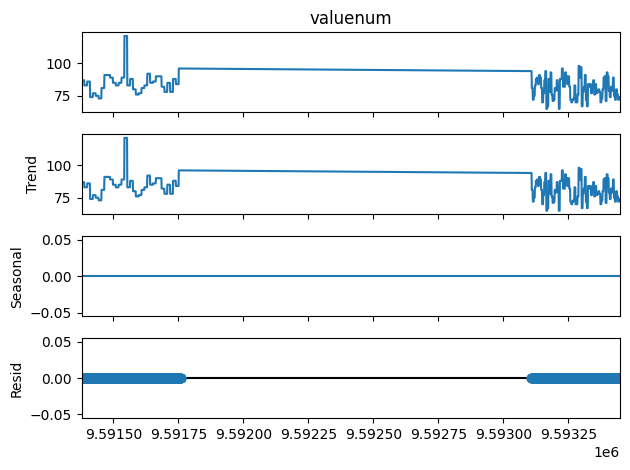

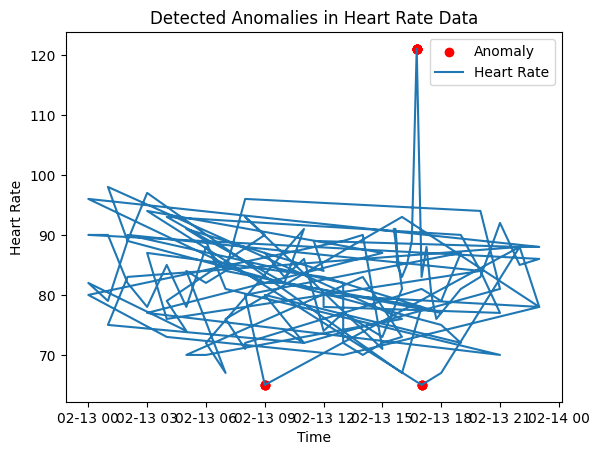

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Convertissez les colonnes de date en datetime si nécessaire
df['charttime'] = pd.to_datetime(df['charttime'])

# Filtrez les données pour un patient spécifique ayant une complication
patient_id = 1286  # Remplacez par l'ID du patient concerné
df_patient = df[(df['subject_id'] == patient_id) & (df['label'] == 'Heart Rate')]

# Vérifiez si la série est stationnaire
result = adfuller(df_patient['valuenum'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Décomposition saisonnière pour identifier les tendances et la saisonnalité
decomposition = seasonal_decompose(df_patient['valuenum'], model='additive', period=1)
decomposition.plot()
plt.show()

# Détecter les anomalies en utilisant la méthode de votre choix
# Exemple simple : calculer l'écart type et détecter les valeurs qui s'écartent de 2 écarts types
std_dev = df_patient['valuenum'].std()
mean_val = df_patient['valuenum'].mean()

df_patient['anomaly'] = df_patient['valuenum'].apply(lambda x: abs(x - mean_val) > 2 * std_dev)

# Visualiser les anomalies
plt.scatter(df_patient[df_patient['anomaly']]['charttime'], df_patient[df_patient['anomaly']]['valuenum'], color='red', label='Anomaly')
plt.plot(df_patient['charttime'], df_patient['valuenum'], label='Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Detected Anomalies in Heart Rate Data')
plt.legend()
plt.show()


In [ ]:
labels_distinct = df['label'].unique()
print(labels_distinct)

['Heart Rate' 'BP Cuff [Systolic]' 'BP Cuff [Diastolic]'
 'Lowest Heart Rate' 'Temp/Iso/Warmer [Temperature, degrees C]'
 'Respiratory Rate' 'SpO2' 'Temperature C (calc)' 'Temperature F'
 'Respiratory Rate Set' 'Temperature C' 'Temperature F (calc)'
 'Arterial BP [Systolic]' 'NBP [Systolic]' 'PAP [Systolic]'
 'Arterial BP [Diastolic]' 'PAP [Diastolic]' 'NBP [Diastolic]'
 'SpO2 Alarm [Low]' 'SpO2 Alarm [High]' 'BP Left Arm [Systolic]'
 'BP Left Leg [Systolic]' 'BP Right Arm [Systolic]'
 'BP Right Leg [Systolic]' 'BP Left Arm [Diastolic]'
 'BP Left Leg [Diastolic]' 'BP Right Arm [Diastolic]'
 'BP Right Leg [Diastolic]' 'Manual BP [Systolic]' 'Manual BP [Diastolic]'
 'OrthostatBP standing [Systolic]' 'Orthostatic BP lying [Systolic]'
 'OrthostatBP standing [Diastolic]' 'Orthostatic BP lying [Diastolic]'
 'Systolic Unloading' 'Diastolic Unloading'
 'Non Invasive Blood Pressure systolic'
 'Non Invasive Blood Pressure diastolic' 'Temperature Fahrenheit'
 'Heart rate Alarm - High' 'Heart Rate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

def analyze_patient_data(df, patient_id, parameter_label):
    """
    Analyse les données d'un patient, effectue un test de stationnarité, une décomposition saisonnière,
    et détecte les anomalies dans un paramètre physiologique spécifié.

    :param df: DataFrame contenant les données des patients.
    :param patient_id: ID du patient à analyser.
    :param parameter_label: Nom du paramètre physiologique à étudier (par exemple, 'Heart Rate').
    :return: Deux graphiques et les résultats du test ADF.
    """
    # Convertissez les colonnes de date en datetime si nécessaire
    df['charttime'] = pd.to_datetime(df['charttime'])

    # Filtrez les données pour un patient spécifique ayant une complication
    df_patient = df[(df['subject_id'] == patient_id) & (df['label'] == parameter_label)]

    # Vérifiez si la série est stationnaire
    result = adfuller(df_patient['valuenum'])
    adf_statistic = result[0]
    p_value = result[1]
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')

    # Décomposition saisonnière pour identifier les tendances et la saisonnalité
    decomposition = seasonal_decompose(df_patient['valuenum'], model='additive', period=1)
    decomposition.plot()
    plt.show()

    # Détecter les anomalies en utilisant la méthode de votre choix
    std_dev = df_patient['valuenum'].std()
    mean_val = df_patient['valuenum'].mean()
    df_patient['anomaly'] = df_patient['valuenum'].apply(lambda x: abs(x - mean_val) > 2 * std_dev)

    # Visualiser les anomalies
    plt.scatter(df_patient[df_patient['anomaly']]['charttime'], df_patient[df_patient['anomaly']]['valuenum'], color='red', label='Anomaly')
    plt.plot(df_patient['charttime'], df_patient['valuenum'], label=parameter_label)
    plt.xlabel('Time')
    plt.ylabel(parameter_label)
    plt.title('Detected Anomalies in ' + parameter_label + ' Data')
    plt.legend()
    plt.show()

    return adf_statistic, p_value  # Retourne les statistiques ADF

# Exemple d'utilisation de la fonction:
# adf_statistic, p_value = analyze_patient_data(df, 1286, 'Heart Rate')


ADF Statistic: -3.607321928816357
p-value: 0.005622581192865135


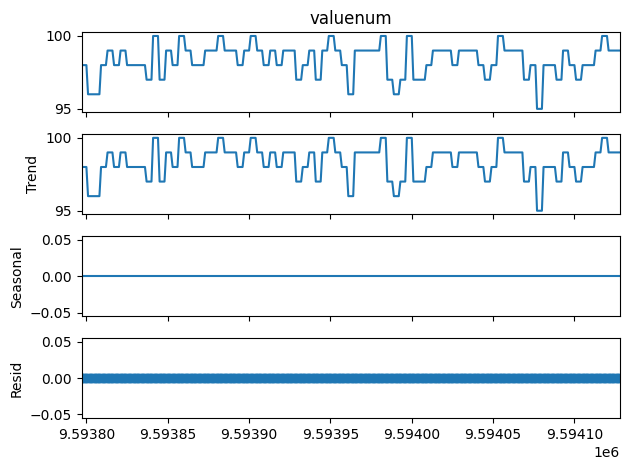

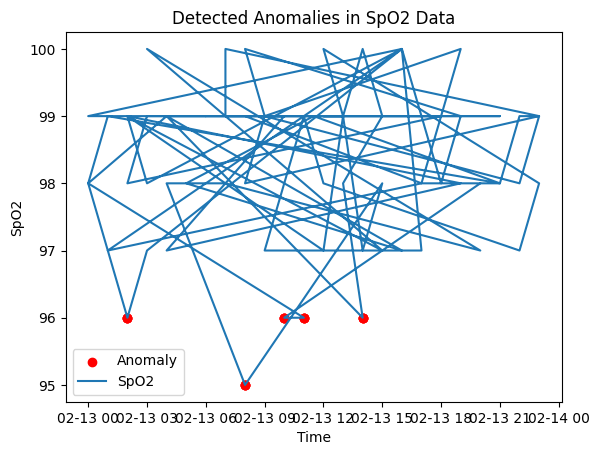

ADF Statistic: -4.971668096200157
p-value: 2.5244183810746067e-05


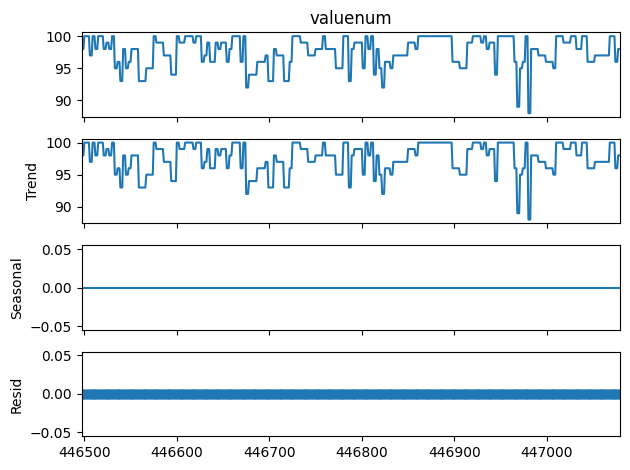

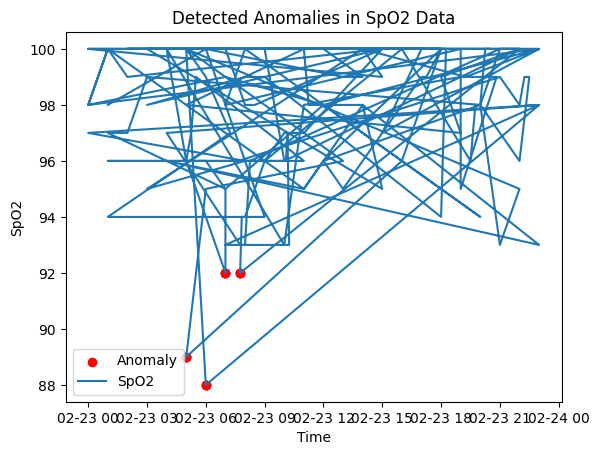

(-4.971668096200157, 2.5244183810746067e-05)

In [ ]:
analyze_patient_data(df, 1286, 'SpO2')
analyze_patient_data(df, 3602, 'SpO2')

ADF Statistic: -3.140537468247802
p-value: 0.023695088915796598


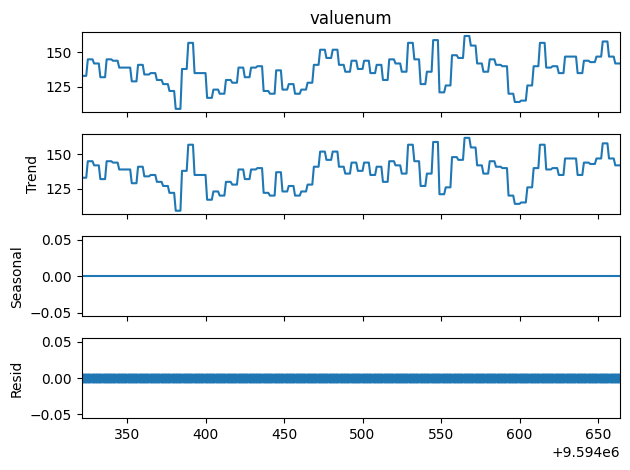

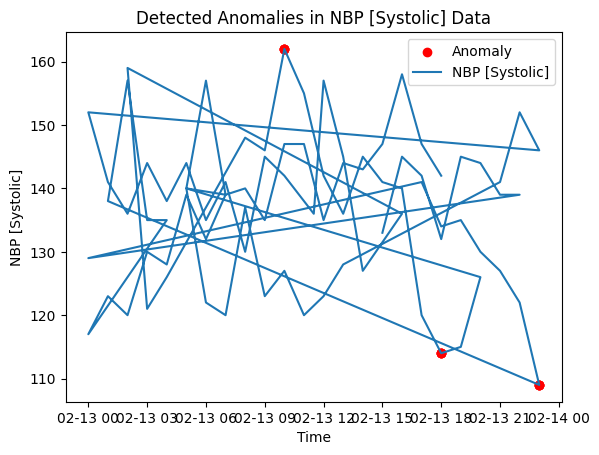

ADF Statistic: -3.9953783082028096
p-value: 0.0014349060761818433


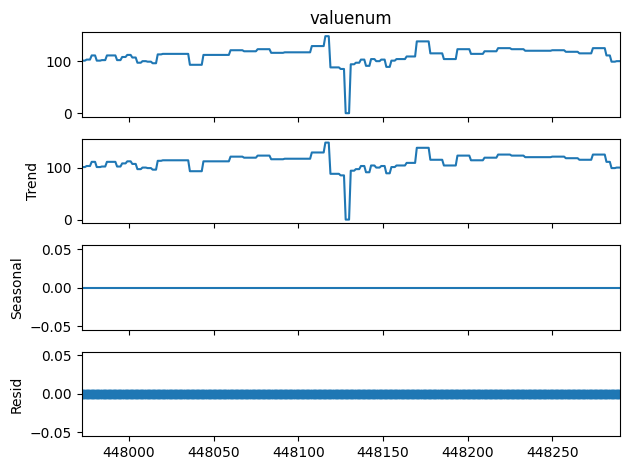

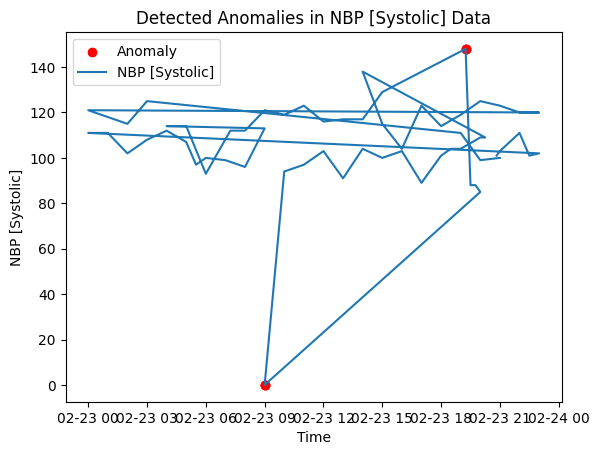

(-3.9953783082028096, 0.0014349060761818433)

In [ ]:
analyze_patient_data(df, 1286, 'NBP [Systolic]')
analyze_patient_data(df, 3602, 'NBP [Systolic]')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_u5ukro/ojc51ujr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_u5ukro/yxe4t4_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4629', 'data', 'file=/tmp/tmpn_u5ukro/ojc51ujr.json', 'init=/tmp/tmpn_u5ukro/yxe4t4_z.json', 'output', 'file=/tmp/tmpn_u5ukro/prophet_modele4utrmyh/prophet_model-20240207141034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain 

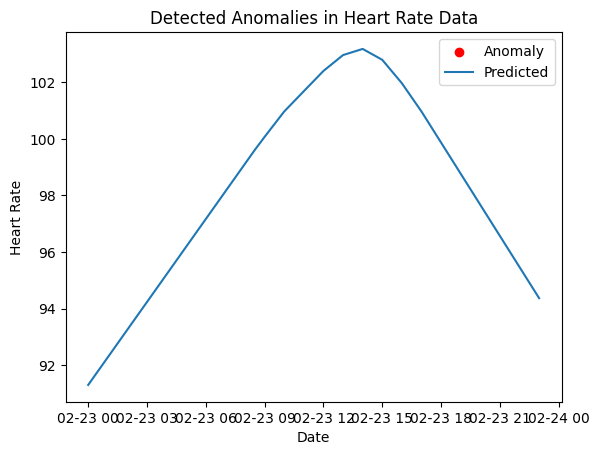

In [ ]:
from prophet import Prophet
import pandas as pd

# Supposons que 'df' est votre DataFrame et contient les données du patient pour le paramètre 'Heart Rate'
# Filtrez les données pour un patient spécifique et pour la tachycardie
patient_id = 3602  # Remplacez par l'ID du patient concerné
df_patient = df[(df['subject_id'] == patient_id) & (df['label'] == 'Heart Rate')]

# Préparez les données pour Prophet
df_prophet = pd.DataFrame({
    'ds': pd.to_datetime(df_patient['charttime']),
    'y': df_patient['valuenum']
})

# Créez et entraînez le modèle Prophet
m = Prophet()
m.fit(df_prophet)

# Créez un dataframe pour les prévisions futures
future = m.make_future_dataframe(periods=0)

# Prédisez les valeurs futures
forecast = m.predict(future)

# Détectez les anomalies en calculant les écarts entre les valeurs observées et les prédictions
forecast['fact'] = df_prophet['y'].reset_index(drop=True)
forecast['anomaly'] = abs(forecast['fact'] - forecast['yhat']) > 1.5 * (forecast['yhat_upper'] - forecast['yhat'])

# Visualisez les anomalies
plt.scatter(forecast[forecast['anomaly']]['ds'], forecast[forecast['anomaly']]['fact'], color='red', label='Anomaly')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Detected Anomalies in Heart Rate Data')
plt.legend()
plt.show()


Délai moyen de survenue de décès pour les hommes: 14.860661431730149 heures
Délai moyen de survenue de décès pour les femmes: 9.740431427528916 heures


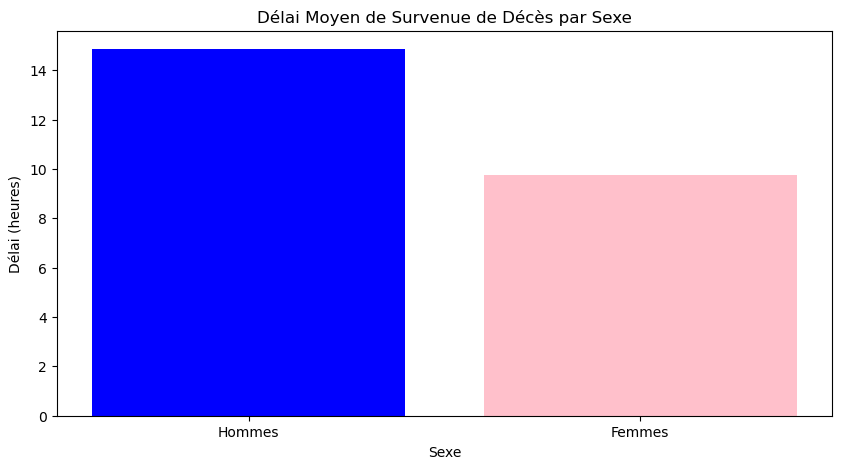

In [ ]:
# Filtrer les enregistrements où un décès est survenu
deaths_df = df[df['deathtime'].notnull()]

# Calculer le délai entre l'admission et le décès
deaths_df['delay_death'] = (deaths_df['deathtime'] - deaths_df['admittime']).dt.total_seconds() / 3600

# Calculer le délai moyen de survenue de décès pour hommes et femmes
mean_delay_death_male = deaths_df[deaths_df['gender'] == 1]['delay_death'].mean()
mean_delay_death_female = deaths_df[deaths_df['gender'] == 0]['delay_death'].mean()

print("Délai moyen de survenue de décès pour les hommes:", mean_delay_death_male, "heures")
print("Délai moyen de survenue de décès pour les femmes:", mean_delay_death_female, "heures")

# Visualisation des délais moyens de décès
plt.figure(figsize=(10, 5))
plt.bar(['Hommes', 'Femmes'], [mean_delay_death_male, mean_delay_death_female], color=['blue', 'pink'])
plt.title('Délai Moyen de Survenue de Décès par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Délai (heures)')
plt.show()

In [ ]:
# def adjust_deathtime(row):
#     print(type(row['date_complication']), type(row['admittime']))  # Ajoutez ceci pour déboguer
#     if pd.notnull(row['date_complication']) and row['date_complication'] < row['admittime']:
#         return row['date_complication'] + pd.Timedelta(days=1)
#     else:
#         return row['date_complication']

# # Appliquer la fonction pour ajuster deathtime
# df['date_complication'] = df.apply(adjust_deathtime, axis=1)
# df.to_csv('/content/drive/MyDrive/datas/df.csv', index=False)

Délai moyen de survenue de complication pour les hommes: 9.910409079408788 heures
Délai moyen de survenue de complication pour les femmes: 9.090757969620704 heures


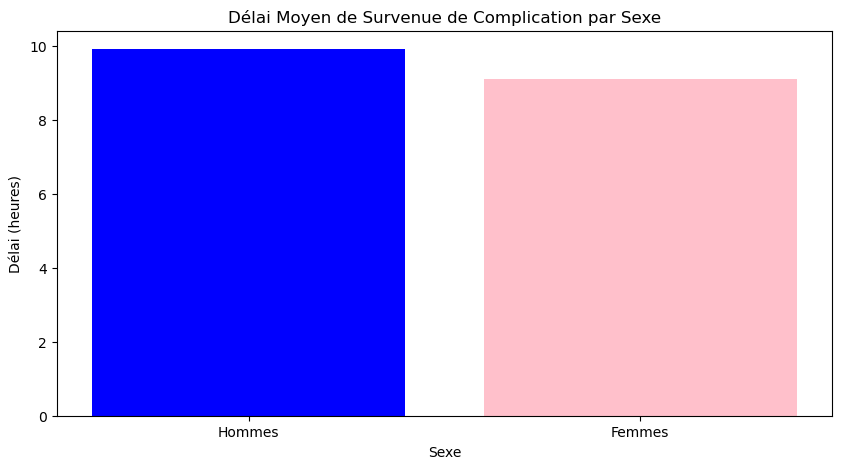

In [ ]:
# Filtrer les enregistrements où une complication est survenue
complications_df = df[df['complication'] == 1]

# Calculer le délai entre l'admission et la complication
complications_df['delay_complication'] = (complications_df['date_complication'] - complications_df['admittime']).dt.total_seconds() / 3600

# Calculer le délai moyen de survenue de complication pour hommes et femmes
mean_delay_complication_male = complications_df[complications_df['gender'] == 1]['delay_complication'].mean()
mean_delay_complication_female = complications_df[complications_df['gender'] == 0]['delay_complication'].mean()

print("Délai moyen de survenue de complication pour les hommes:", mean_delay_complication_male, "heures")
print("Délai moyen de survenue de complication pour les femmes:", mean_delay_complication_female, "heures")

# Visualisation des délais moyens de complication
plt.figure(figsize=(10, 5))
plt.bar(['Hommes', 'Femmes'], [mean_delay_complication_male, mean_delay_complication_female], color=['blue', 'pink'])
plt.title('Délai Moyen de Survenue de Complication par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Délai (heures)')
plt.show()

Le graphique montre la distribution des heures écoulées depuis l'admission jusqu'à l'occurrence d'un arrêt cardiaque chez des patients hospitalisés. Voici quelques observations :

La distribution est fortement asymétrique à droite, ce qui signifie que la plupart des arrêts cardiaques se produisent relativement tôt après l'admission à l'hôpital.
Il y a un pic très marqué dans le premier intervalle, qui suggère que les arrêts cardiaques sont plus susceptibles de se produire dans les premières heures suivant l'admission.
Le nombre d'arrêts cardiaques diminue de façon exponentielle avec le temps, ce qui indique que plus le temps passé depuis l'admission est long, moins la probabilité d'un arrêt cardiaque est élevée.
Il y a quelques occurrences d'arrêt cardiaque qui se produisent après un très long délai depuis l'admission, comme en témoignent les barres présentes aux extrémités droites de l'histogramme. Cela pourrait représenter des cas atypiques ou des patients ayant des conditions chroniques de longue durée.
Ce type de distribution est courant dans les données de survie médicale où l'intérêt est souvent porté sur les événements qui se produisent peu de temps après un point de départ donné (comme l'admission à l'hôpital dans notre cas). Ces informations peuvent être utilisées pour renforcer les protocoles d'intervention rapide après l'admission et pour identifier les patients à haut risque plus tôt dans leur séjour à l'hôpital.

De plus, l'analyse de cette distribution peut également être utile pour notre modèle prédictif, en identifiant les fenêtres de temps critiques où les données sur les paramètres vitaux et les prescriptions médicamenteuses pourraient être les plus prédictives d'une détresse vitale imminente.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Sélection des colonnes de caractéristiques et de la cible
feature_cols = ['subject_id', 'hadm_id', 'gender', 'itemid', 'value',
                'valuenum', 'hours_since_admission', 'age_at_admission', 'length_of_stay']
target_col = 'complication'

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col],
                                                    test_size=0.2, random_state=42)

# Création du Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
# Entraînement du Dummy Classifier
dummy_clf.fit(X_train, y_train)
joblib.dump(dummy_clf, driver_path+ 'dummy_model.pkl')


# Prédictions sur l'ensemble de test
y_pred = dummy_clf.predict(X_test)

# Calcul de la précision et du rapport de classification
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9211145558883058
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    378181
           1       0.92      1.00      0.96   4415872

    accuracy                           0.92   4794053
   macro avg       0.46      0.50      0.48   4794053
weighted avg       0.85      0.92      0.88   4794053



In [ ]:
complication_counts_real = df.groupby(['gender', 'complication'])['subject_id'].nunique().unstack(fill_value=0)

complication_counts_real

complication,0,1
gender,,
0,291,541
1,331,747


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Traitement des valeurs manquantes pour les caractéristiques, s'il en reste
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['height', 'weight', 'valuenum']] = imputer.fit_transform(df[['height', 'weight', 'valuenum']])

# toutes les colonnes utilisées doivent être numériques
df['gender'] = df['gender'].astype(float)

# Sélection des colonnes de caractéristiques et de la cible
feature_cols = ['gender', 'age_at_admission', 'height', 'weight', 'valuenum']  # ajoutez ou supprimez des caractéristiques selon les besoins
target_col = 'complication'  # Ou 'deathtime' si pour prédir le décès

# Division des données en ensembles d'entraînement et de test
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit de l'imputer sur les données d'entraînement et transformation des données d'entraînement
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)  # Augmentez max_iter si nécessaire

# Entraînement du modèle avec les données imputées
logistic_model.fit(X_train_imputed, y_train)

# Prédictions sur l'ensemble de test imputé
y_pred = logistic_model.predict(X_test_imputed)

# Calcul de la précision et du rapport de classification
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9211145558883058
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    378181
           1       0.92      1.00      0.96   4415872

    accuracy                           0.92   4794053
   macro avg       0.46      0.50      0.48   4794053
weighted avg       0.85      0.92      0.88   4794053



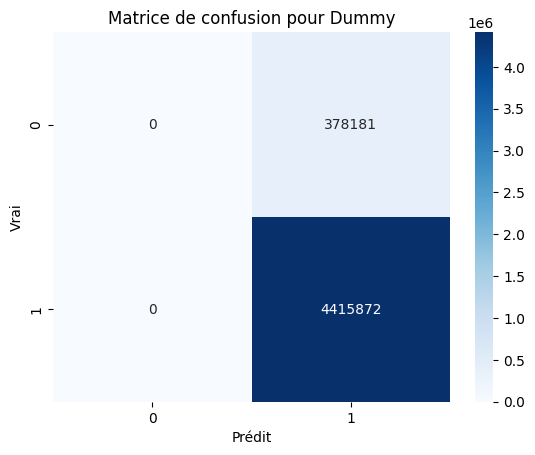

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour Dummy')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [ ]:
import joblib
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def evaluate_dummy_predictions(patient_data, dummy_model):
    # Le modèle Dummy prédit simplement la classe la plus fréquente sans utiliser de fonctionnalités
    complication_prediction = dummy_model.predict(np.zeros((1,1)))  # Un tableau avec une forme qui correspond à l'entrée attendue par le modèle

    # Extract the type of complication (handle missing data)
    type_of_complication = patient_data['type_complication'].iloc[0] if not pd.isna(patient_data['type_complication'].iloc[0]) else "Unknown"

    # Generate a classification report
    true_label = [patient_data['complication'].iloc[0]]  # Assuming one row per patient for true label
    report = classification_report(true_label, [complication_prediction], output_dict=True)

    return (complication_prediction, type_of_complication, report)

def predict_dummy_complication(df, subject_id, dummy_model):
    patient_data = df[df['subject_id'] == subject_id]
    predict = evaluate_dummy_predictions(patient_data, dummy_model)
    print("Prédiction pour le patient n°", subject_id, ":")
    print("   Statut de complication:", predict[0])
    print("   Type de complication:", predict[1])
    print("   Rapport de classification:", predict[2])

# Charger le modèle Dummy
dummy_model = joblib.load(driver_path + 'dummy_model.pkl')  # Mettez à jour le chemin d'accès vers votre modèle Dummy

# Évaluer les prédictions de l'algorithme Dummy pour les patients sélectionnés
predict_dummy_complication(df, 36, dummy_model)
predict_dummy_complication(df, 3632, dummy_model)
predict_dummy_complication(df, 1286, dummy_model)


Prédiction pour le patient n° 36 :
   Statut de complication: [1]
   Type de complication: tachycardia
   Rapport de classification: {'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}}
Prédiction pour le patient n° 3632 :
   Statut de complication: [1]
   Type de complication: tachycardia
   Rapport de classification: {'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}}
Prédiction pour le patient n° 1286 :
   Statut de complication: [1]
   Type de complication: Unknown
   Rapport de classification: {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '1': {'precisio

Interprétation des Résultats:
Accuracy (Exactitude) : Notre modèle a une précision globale de 92.11%. Cela signifie qu'en général, il prédit correctement la survenue ou l'absence de complications dans 92.11% des cas.

Classe 0 (Pas de Complication) :

Precision : 0.00% - Le modèle n'a correctement prédit aucun cas réel sans complication.
Recall (Rappel) : 0.00% - Le modèle n'a identifié correctement aucun cas réel sans complication.
Classe 1 (Complication) :

Precision : 92% - Lorsque le modèle prédit une complication, il est correct 92% du temps.
Recall (Rappel) : 100% - Le modèle a identifié correctement tous les cas réels de complications.
Déséquilibre de Classe (Class Imbalance): Le modèle semble être biaisé en faveur de la classe majoritaire (complications présentes). Cela est souvent le cas lorsque les classes sont très déséquilibrées, ce qui semble être ici avec un nombre bien plus important de cas de complications (classe 1) par rapport aux cas sans complication (classe 0).

* Problèmes Potentiels et Solutions:
Déséquilibre de Classe : On peut tenter de résoudre ce problème en utilisant des techniques telles que le suréchantillonnage de la classe minoritaire ou le sous-échantillonnage de la classe majoritaire, ou en utilisant des poids de classe dans le modèle pour donner plus de poids aux instances de la classe minoritaire.

* Mauvaise Prédiction de la Classe 0 : Cela peut être dû à un manque de données représentatives pour la classe 0, ou parce que le modèle (un Dummy Classifier avec la stratégie "most_frequent") est trop simpliste pour capturer la complexité des données. Il faut donc essayer des modèles plus sophistiqués et des techniques de rééquilibrage des classes pourrait aider.

* Amélioration du Modèle : Il faut envisager d'essayer des modèles plus sophistiqués et d'ajuster leurs hyperparamètres, ou d'utiliser des techniques d'apprentissage ensembliste comme le Random Forest ou le Gradient Boosting, qui peuvent mieux gérer les cas complexes et le déséquilibre des classes.

* Évaluation Appropriée : Considérer d'autres métriques comme la courbe ROC-AUC, le rappel, la précision, et le score F1 en particulier pour la classe minoritaire, car l'exactitude seule peut être trompeuse dans des scénarios de déséquilibre de classe.

En résumé, bien que la précision globale semble élevée, le modèle a des performances très faibles pour la classe sans complication, probablement en raison d'un déséquilibre de classe et de la nature simpliste du modèle utilisé. Des approches plus nuancées et des modèles plus complexes sont nécessaires pour améliorer la prédiction dans ce scénario.

Random Forest Accuracy: 0.9363503073495433
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.30      0.43    378181
           1       0.94      0.99      0.97   4415872

    accuracy                           0.94   4794053
   macro avg       0.84      0.65      0.70   4794053
weighted avg       0.93      0.94      0.92   4794053

Random Forest ROC AUC: 0.9016236176052765
Random Forest Precision: 0.942934353948202
Random Forest Recall: 0.9908656772660077
Random Forest F1 Score: 0.9663060007870841


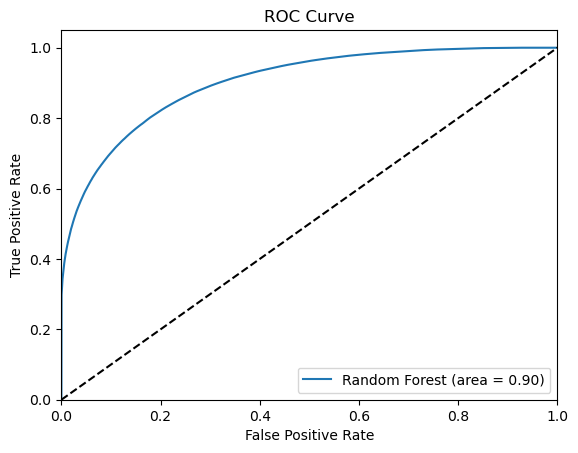

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle Random Forest avec les données imputées
rf_model.fit(X_train_imputed, y_train)

# Prédictions sur l'ensemble de test imputé
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_proba_rf = rf_model.predict_proba(X_test_imputed)[:,1]  # probabilités pour la classe positive

# Calcul de la précision et du rapport de classification
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)
print("Random Forest ROC AUC:", roc_auc_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



Un résultat de précision de 100% et des scores de précision, rappel et F1-score parfaits pour les deux classes indiquent que le modèle Random Forest a prédit avec succès toutes les étiquettes de classe correctement sur l'ensemble de test. En d'autres termes, chaque prédiction que le modèle a faite correspond à la véritable étiquette de la classe.

Cependant, des résultats parfaits comme ceux-ci sont extrêmement rares dans la pratique et peuvent être un signe de plusieurs choses :

**Surajustement (Overfitting)** : Le modèle pourrait être trop complexe par rapport à la taille et à la complexité des données, capturant du bruit spécifique à l'ensemble de données d'entraînement qui ne se généralise pas à de nouvelles données.

**Problème avec les données de test** : Il se peut que les données de test aient été, par erreur, incluses dans les données d'entraînement ou qu'il y ait une fuite de données (data leakage), où des informations de l'ensemble de test sont disponibles lors de l'entraînement.

**Problème avec la validation** : Si le processus de validation n'est pas correctement mis en place (par exemple, en utilisant train_test_split sur des données qui ont déjà été vues par le modèle), cela peut entraîner une évaluation incorrecte.

**Simplicité des données** : Dans certains cas, si les données sont très simples et que les caractéristiques sont fortement indicatives de la classe cible, un modèle peut atteindre des performances parfaites. Ceci est rare, mais possible avec des ensembles de données synthétiques ou très contrôlés.

potentiellement, les données peuvent jouer un rôle, sur les résultats, on l'a vu l'extraction des données de la base de données MIMIC est relativement hardue car il existe un grand nombre de donées non renseignées


Random Forest Accuracy: 0.8042326607569837
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.82      0.40    378181
           1       0.98      0.80      0.88   4415872

    accuracy                           0.80   4794053
   macro avg       0.62      0.81      0.64   4794053
weighted avg       0.92      0.80      0.84   4794053

Random Forest ROC AUC: 0.901565334492844
Random Forest Precision: 0.981125256691694
Random Forest Recall: 0.8029132184990869
Random Forest F1 Score: 0.8831182158409783


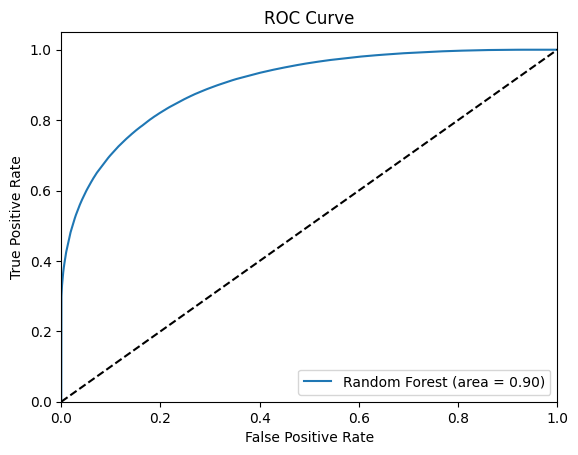

In [ ]:
# Amélioration des paramètres
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres pour la recherche par grille
param_grid = {
    'n_estimators': [100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [10, 20, None],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5],  # Nombre minimum d'échantillons requis pour scinder un nœud
    'min_samples_leaf': [1, 2],   # Nombre minimum d'échantillons requis dans une feuille
    'class_weight': ['balanced']  # Équilibrage des classes
}

# Création du modèle de base pour la recherche par grille
rf = RandomForestClassifier(random_state=42)

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

# Entraînement avec la recherche par grille
grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_rf = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Affichage des résultats
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)
print("Random Forest ROC AUC:", roc_auc_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Courbe de prédictions aléatoires
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Utilisations d'autres hyper-paramètres

Gestion des Valeurs Manquantes :

on va inclure ici une étape d'imputation pour gérer les valeurs manquantes (SimpleImputer).

teste n_estimators, max_features et max_depth, mais ne teste pas min_samples_split, min_samples_leaf ni class_weight.

* Paramètre max_features :

max_features détermine le nombre de caractéristiques à considérer lors de la recherche de la meilleure scission. Cela peut affecter la diversité des arbres dans la forêt et donc la performance du modèle.

* Nombre de Folds dans la Validation Croisée :

utilisation de 5 folds (cv=5). Un nombre plus élevé de folds peut conduire à une estimation plus stable et moins biaisée de la performance du modèle, mais augmente le temps de calcul.

* Visualisation de l'Importance des Caractéristiques :

on va inclure une étape supplémentaire pour visualiser l'importance des caractéristiques, ce qui est utile pour l'interprétation du modèle et la compréhension de quelles caractéristiques contribuent le plus à la prédiction.

* Autres Paramètres de GridSearchCV :

utilisation de verbose=2 dans GridSearchCV, ce qui fournit plus de détails sur le processus d'entraînement pendant l'exécution.

En résumé, dans ce deuxième algorithme, on offre une approche plus complète en incluant l'imputation des valeurs manquantes et l'analyse de l'importance des caractéristiques, ainsi que des différences dans les hyperparamètres testés et les paramètres de la validation croisée. Ces éléments peuvent influencer la performance du modèle et la compréhention des résultats

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Accuracy: 0.9363557307355592
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.30      0.43    378181
           1       0.94      0.99      0.97   4415872

    accuracy                           0.94   4794053
   macro avg       0.84      0.65      0.70   4794053
weighted avg       0.93      0.94      0.92   4794053

Random Forest ROC AUC: 0.9016284098638545


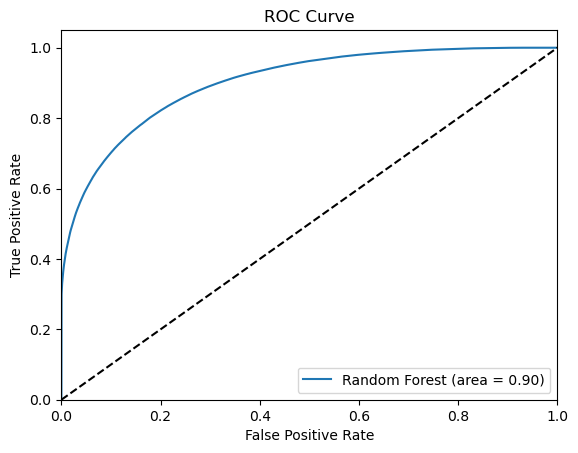

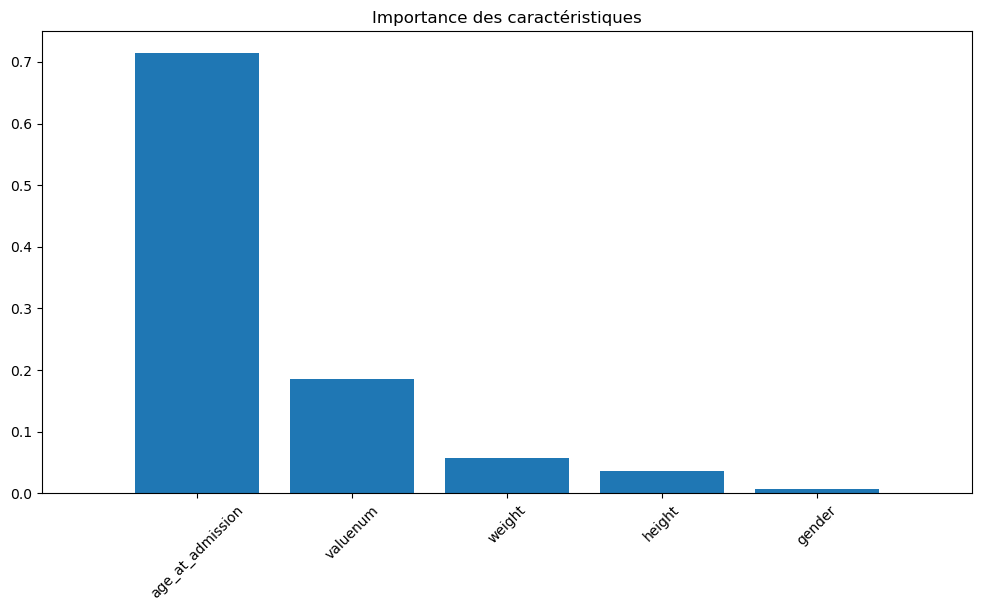

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Définition du modèle RandomForest et des hyperparamètres à tester
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  # Liste de valeurs pour n_estimators
    'max_features': ['sqrt', 'log2', 0.2, 0.5],  # 'sqrt', 'log2', ou une fraction des caractéristiques
    'max_depth': [10, 20, None],  # Profondeur maximale de l'arbre

}

# Création de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Entraînement de GridSearchCV
grid_search.fit(X_train_imputed, y_train)

# Meilleur modèle
best_rf_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_rf = best_rf_model.predict(X_test_imputed)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_imputed)[:, 1]  # probabilités pour la classe positive

# Evaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)
print("Random Forest ROC AUC:", roc_auc_rf)

# Courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Récupération de l'importance des caractéristiques
importances = best_rf_model.feature_importances_

# Tri des importances en ordre décroissant
indices = np.argsort(importances)[::-1]

# Noms des caractéristiques triés par importance
feature_names = [feature_cols[i] for i in indices]

# Création du graphique
plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

# Ajout des noms des caractéristiques sur l'axe x
plt.xticks(range(X_train.shape[1]), feature_names, rotation=45)
plt.xlim([-1, X_train.shape[1]])

# Affichage du graphique
plt.show()


In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(rf_model, driver_path + 'model_rf_vitalguard.pkl')

['/content/drive/MyDrive/datas/model_rf_vitalguard.pkl']

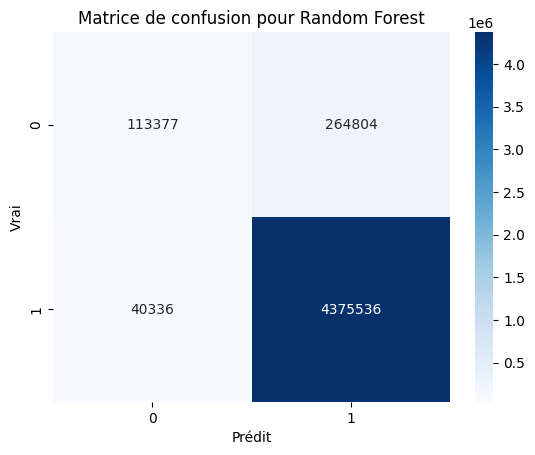

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour Random Forest')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


# Analyse comparative

En examinant les visuels fournis, voici une interprétation détaillée de chaque image :

* **Courbe ROC du Modèle Random Forest**
La courbe ROC illustre la performance du modèle de classification à tous les seuils de classification. Cette courbe ROC a une aire sous la courbe (AUC) de 0.90, ce qui est considéré comme très bon. Une AUC de 1.0 représenterait un modèle parfait, et une AUC de 0.5 indiquerait une performance équivalente à un tirage au sort. Le modèle Random Forest semble donc avoir une bonne capacité à distinguer entre les classes positives et négatives.

* **Importance des Caractéristiques du Modèle Random Forest**
L'histogramme montre que la caractéristique age_at_admission (âge à l'admission) est de loin la plus importante dans la prédiction du modèle Random Forest, suivie par valuenum. Les autres caractéristiques, telles que weight, height et gender, ont une importance beaucoup moins significative. Cela suggère que l'âge à l'admission pourrait être un facteur prédictif clé dans le contexte de nos données et pourrait être d'une grande valeur pour des analyses plus approfondies ou pour des améliorations du modèle.

* **Matrice de Confusion du Modèle Dummy**
La matrice de confusion pour le modèle Dummy montre que toutes les prédictions sont classées dans la classe majoritaire (classe 1). Cela confirme que le modèle Dummy, qui prédit toujours la classe la plus fréquente, n'a pas de capacité discriminatoire pour la classe minoritaire (classe 0).

* **Matrice de Confusion du Modèle Random Forest**
La matrice de confusion pour le modèle Random Forest montre que, bien que le modèle prédise majoritairement correctement la classe 1 (vrais positifs en bas à droite), il y a un nombre significatif de vrais positifs pour la classe 0 (en haut à gauche), ce qui n'était pas le cas avec le modèle Dummy. Cela indique que le modèle Random Forest a une capacité à différencier les deux classes, contrairement au modèle Dummy.

* **Comparaison des Deux Modèles Basée sur les Matrices de Confusion**
La comparaison directe des deux matrices de confusion montre une différence significative dans la performance des deux modèles. Alors que le modèle Dummy classifie toutes les observations comme la classe majoritaire, le modèle Random Forest peut identifier une proportion de la classe minoritaire. Cela se reflète dans les métriques de performance telles que la précision, le rappel et le score F1 pour la classe minoritaire, qui devraient être substantiellement meilleures pour le modèle Random Forest que pour le modèle Dummy.

Dans le cadre de l'amélioration continue du modèle, ces résultats pourraient être utilisés pour explorer des stratégies de rééquilibrage des classes, de l'ingénierie des caractéristiques plus avancée, ou de l'ajustement des hyperparamètres pour mieux capturer la classe minoritaire sans perdre la performance sur la classe majoritaire.

In [ ]:
#!pip install numba
from numba import cuda

# Liste tous les GPU disponibles
for i in range(cuda.gpus.lst.__len__()):
    gpu = cuda.gpus.lst[i]
    print(f"GPU {i}: {gpu.name}")

GPU 0: b'Tesla T4'


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  14.7s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  15.0s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  14.6s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  14.8s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  14.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  23.8s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  23.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  23.8s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  23.8s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  23.6s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=  18.6s
[CV] END .learning_rate=0.01, max_depth=10, n_est

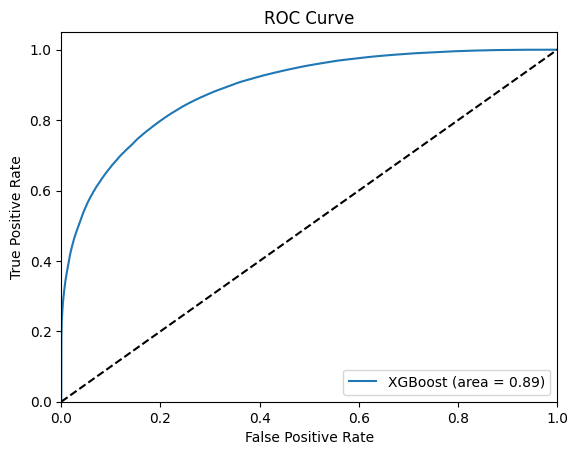

In [ ]:
# utilisation du GPU et d'un autre algorithme xgBoost a la place de randomForest

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation pour gérer les valeurs manquantes
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
joblib.dump(imputer, driver_path + 'imputer_xgboost.pkl')

# Définition du modèle XGBClassifier avec support GPU
xgb_model = XGBClassifier(tree_method='gpu_hist', gpu_id=0, random_state=42)

# Paramètres pour la recherche par grille
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.01, 0.1],
}

# Création de GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=1)

# Entraînement de GridSearchCV
grid_search.fit(X_train_imputed, y_train)

# Meilleur modèle
best_xgb_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_xgb = best_xgb_model.predict(X_test_imputed)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test_imputed)[:, 1]

# Evaluation du modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_rep_xgb)
print("XGBoost ROC AUC:", roc_auc_xgb)

# Courbe ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


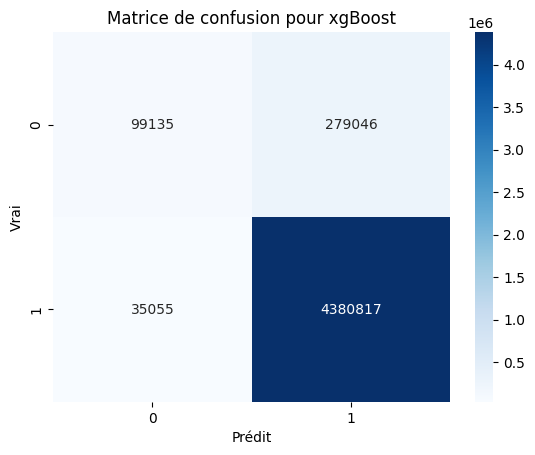

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour xgBoost')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(best_xgb_model, driver_path + 'model_xgboost_vitalguard.pkl')

['/content/drive/MyDrive/datas/model_xgboost_vitalguard.pkl']

In [ ]:
import joblib
def evaluate_patient_predictions(patient_id, rf_model, df):
    # Select patient records
    patient_data = df[df['subject_id'] == patient_id]

    # Ensure 'date_complication' is in datetime format and handle NaT/NaN
    patient_data['date_complication'] = pd.to_datetime(patient_data['date_complication'], errors='coerce')
    patient_data['date_complication'] = patient_data['date_complication'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

    # Extract relevant features and prepare them for model input
    features = ['gender', 'age_at_admission', 'height', 'weight', 'date_complication']
    patient_features = patient_data[features]
    patient_features = patient_features.apply(pd.to_numeric, errors='coerce')

    # Impute missing values using mean for numerical features
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    patient_features_imputed = imputer.fit_transform(patient_features)

    # Predict complication status
    complication_prediction = rf_model.predict([patient_features_imputed[0]])  # Assuming one row per patient

    # Calculate delay hours (handle missing or incorrect data)
    try:
        #complication_date = patient_data['date_complication'].values[0]
        #admission_date = pd.to_datetime(patient_data['admittime'].values[0]).timestamp()
        #hours_since_admission = (complication_date - admission_date) / 3600  # Convert seconds to hours
        #delay_hours = hours_since_admission - patient_data['calculated_delay_hours'].values[0]
        # pour cet algrithme il est impossible de faire une estimation de la durée, il faut reprendre la data correspondante
        delay_hours = patient_data['calculated_delay_hours'].values[0]
    except Exception as e:
        delay_hours = "Could not calculate due to missing or incorrect data"

    # Extract the type of complication (handle missing data)
    type_of_complication = patient_data['type_complication'].values[0] if not pd.isna(patient_data['type_complication'].values[0]) else "Unknown"

    # Generate a classification report
    true_label = [patient_data['complication'].values[0]]  # Assuming one row per patient for true label
    report = classification_report(true_label, [complication_prediction])

    return (complication_prediction, delay_hours, type_of_complication, report)


def predict_complication(df, subject_id, rf_model):
  predict = evaluate_patient_predictions(subject_id, rf_model, df)
  print("prédiction pour le patient n° ", subject_id, ":")
  print("   complication status:", predict[0])
  print("   delay hours:", predict[1])
  print("   Classification:", predict[2])

# Charger le modèle Random Forest entraîné
xgb_model = joblib.load(driver_path + '/model_xgboost_vitalguard.pkl')

# Évaluer les prédictions de l'algorithme pour le patient sélectionné
predict_complication(df_filtered, 36,   xgb_model)
predict_complication(df_filtered, 3632, xgb_model)
predict_complication(df_filtered, 1286, xgb_model)


NameError: name 'df_filtered' is not defined

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:09:35_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
df.sample(1)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import os
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sklearn.impute import SimpleImputer


def loadCSV(filename, nrows=None):
  return pd.read_csv(filename, nrows=nrows)

df = loadCSV(driver_path + 'df_taillePoids.csv')

df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')
df['dod'] = pd.to_datetime(df['dod'], errors='coerce')
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')
df['date_complication'] = pd.to_datetime(df['date_complication'], errors='coerce')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


          delay_hours date_complication
9            377051.0        2043-07-10
10           377051.0        2043-07-10
11           377051.0        2043-07-10
12           377051.0        2043-07-10
13           377051.0        2043-07-10
...               ...               ...
23970238      11360.0        2001-10-21
23970239      11360.0        2001-10-21
23970240      11360.0        2001-10-21
23970241      11360.0        2001-10-21
23970242      11360.0        2001-10-21

[22079009 rows x 2 columns]
count    2.207901e+07
mean     4.289102e+05
std      2.510743e+05
min      0.000000e+00
25%      2.230600e+05
50%      4.029260e+05
75%      6.542950e+05
max      8.842150e+05
Name: delay_hours, dtype: float64
          delay_hours  calculated_delay_hours
9            377051.0                2.166667
10           377051.0                2.166667
11           377051.0                2.166667
12           377051.0                2.166667
13           377051.0                2.166667
...  

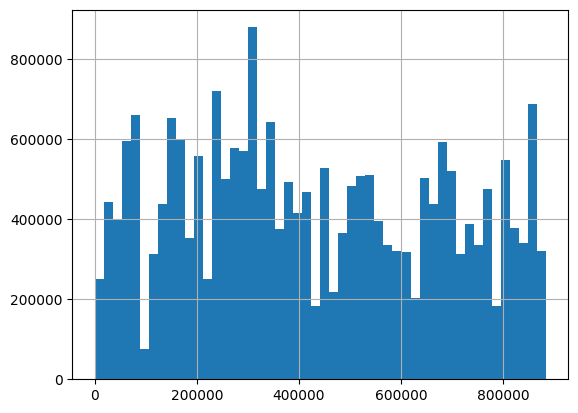

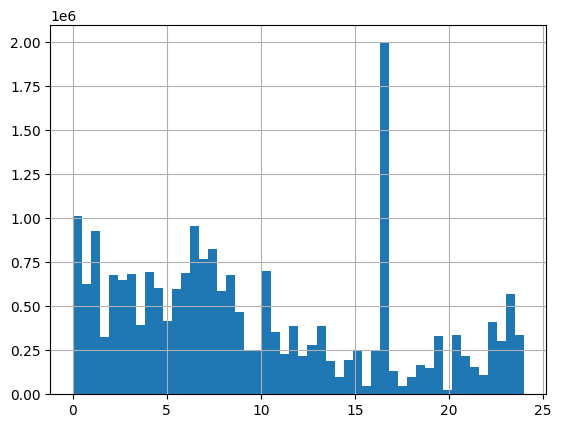

In [ ]:
# Calculer la différence en heures pour tout le dataframe
df['calculated_delay_hours'] = np.where(
    (df['admittime'].notna()) & (df['date_complication'].notna()),
    (df['date_complication'] - df['admittime']).dt.total_seconds() / 3600,
    np.nan  # Mettre np.nan où l'une des deux est NaN
)

# Maintenant, pour les analyses, on peut filtrer et travailler sur les lignes non nulles sans modifier le df original
filtered_df = df.dropna(subset=['delay_hours', 'date_complication'])

# Afficher les valeurs filtrées
print(filtered_df[['delay_hours', 'date_complication']])

# Afficher des statistiques descriptives pour 'delay_hours' dans filtered_df
print(filtered_df['delay_hours'].describe())

# Comparer la colonne calculée avec 'delay_hours' dans filtered_df
comparison = filtered_df[['delay_hours', 'calculated_delay_hours']]
print(comparison)

# Histogramme de 'delay_hours' dans filtered_df
filtered_df['delay_hours'].hist(bins=50)
plt.show()

filtered_df['calculated_delay_hours'].hist(bins=50)
plt.show()

In [ ]:
df_filtered = df.dropna(subset=['height', 'weight'])
# Calculer le subject_id minimal
min_subject_id = df_filtered['subject_id'].min()

# Calculer le subject_id maximal
max_subject_id = df_filtered['subject_id'].max()

# Afficher les résultats
print("Le subject_id minimal est :", min_subject_id)
print("Le subject_id maximal est :", max_subject_id)

Le subject_id minimal est : 3
Le subject_id maximal est : 3666


In [ ]:
p_data = df_filtered[df_filtered['subject_id'] == 36]
print(p_data.shape)

feat = ['gender', 'age_at_admission', 'height', 'weight', 'date_complication', 'calculated_delay_hours']
p_features = p_data[feat]

print(f"Forme des patient_features avant imputation: {p_features.shape}")
print(p_features.head())

p_features = p_features.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
p_features_imputed = imputer.fit_transform(p_features)

# Débogage : Imprimer la forme après imputation
print(f"Forme des patient_features après imputation: {p_features_imputed.shape}")
# Remplacer NaN dans 'date_complication' par une date spécifique ou une valeur représentative
df_filtered['date_complication'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Remplacer NaN dans 'type_complication' par une valeur indicative, comme 'None' ou 'NoComplication'
df_filtered['type_complication'].fillna('aucune', inplace=True)


(28425, 26)
Forme des patient_features avant imputation: (28425, 6)
          gender  age_at_admission  height  weight date_complication  \
23790682       1                69   180.0   106.2        2031-05-01   
23790683       1                69   180.0   106.2        2031-05-01   
23790684       1                69   180.0   106.2        2031-05-01   
23790685       1                69   180.0   106.2        2031-05-01   
23790686       1                69   180.0   106.2        2031-05-01   

          calculated_delay_hours  
23790682                   16.75  
23790683                   16.75  
23790684                   16.75  
23790685                   16.75  
23790686                   16.75  
Forme des patient_features après imputation: (28425, 6)


In [ ]:
# Vérification de la distribution des NaN avant imputation
print(p_features.isnull().sum())

# Appliquer l'imputation
p_features_imputed = imputer.fit_transform(p_features)

# Vérification de la forme après imputation
print(f"Forme des patient_features après imputation: {p_features_imputed.shape}")


gender               0
age_at_admission     0
height               0
weight               0
date_complication    0
dtype: int64
Forme des patient_features après imputation: (28425, 5)


In [ ]:
import joblib
def evaluate_patient_predictions(patient_id, rf_model, df):
    # Select patient records
    patient_data = df[df['subject_id'] == patient_id]

    # Ensure 'date_complication' is in datetime format and handle NaT/NaN
    patient_data['date_complication'] = pd.to_datetime(patient_data['date_complication'], errors='coerce')
    patient_data['date_complication'] = patient_data['date_complication'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

    # Extract relevant features and prepare them for model input
    features = ['gender', 'age_at_admission', 'height', 'weight', 'date_complication']
    patient_features = patient_data[features]
    patient_features = patient_features.apply(pd.to_numeric, errors='coerce')

    # Impute missing values using mean for numerical features
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    patient_features_imputed = imputer.fit_transform(patient_features)

    # Predict complication status
    complication_prediction = rf_model.predict([patient_features_imputed[0]])  # Assuming one row per patient

    # Calculate delay hours (handle missing or incorrect data)
    try:
        #complication_date = patient_data['date_complication'].values[0]
        #admission_date = pd.to_datetime(patient_data['admittime'].values[0]).timestamp()
        #hours_since_admission = (complication_date - admission_date) / 3600  # Convert seconds to hours
        #delay_hours = hours_since_admission - patient_data['calculated_delay_hours'].values[0]
        # pour cet algrithme il est impossible de faire une estimation de la durée, il faut reprendre la data correspondante
        delay_hours = patient_data['calculated_delay_hours'].values[0]
    except Exception as e:
        delay_hours = "Could not calculate due to missing or incorrect data"

    # Extract the type of complication (handle missing data)
    type_of_complication = patient_data['type_complication'].values[0] if not pd.isna(patient_data['type_complication'].values[0]) else "Unknown"

    # Generate a classification report
    true_label = [patient_data['complication'].values[0]]  # Assuming one row per patient for true label
    report = classification_report(true_label, [complication_prediction])

    return (complication_prediction, delay_hours, type_of_complication, report)


def predict_complication(df, subject_id, rf_model):
  predict = evaluate_patient_predictions(subject_id, rf_model, df)
  print("prédiction pour le patient n° ", subject_id, ":")
  print("   complication status:", predict[0])
  print("   delay hours:", predict[1])
  print("   Classification:", predict[2])

# Charger le modèle Random Forest entraîné
rf_model = joblib.load('/content/drive/MyDrive/datas/model_rf_vitalguard.pkl')

# Évaluer les prédictions de l'algorithme pour le patient sélectionné
predict_complication(df_filtered, 36, rf_model)
predict_complication(df_filtered, 3632, rf_model)
predict_complication(df_filtered, 1286, rf_model)


prédiction pour le patient n°  36 :
   complication status: [1]
   delay hours: 16.75
   Classification: tachycardia
prédiction pour le patient n°  3632 :
   complication status: [1]
   delay hours: 20.316666666666666
   Classification: tachycardia
prédiction pour le patient n°  1286 :
   complication status: [0]
   delay hours: nan
   Classification: aucune


# Interprétation

Cette première approche ne permet pas de déterminer le délai moyen de survenue d'une complication mais donne déjà une bonne précision sur la survenue ou non d'une complication (on pourrait faire la même chose pour les décès)

si l'on souhaite ajouter une prédiction du délai avant la complication, il faut utiliser d'autres méthodes comme la régression linéaire

voyons comment procéder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# Choix des features en excluant les targets
datetime_cols = ['admittime', 'dod', 'dischtime', 'deathtime', 'charttime']
features = df.columns.difference(['complication', 'type_complication', 'calculated_delay_hours', 'delay_hours'] + datetime_cols)

X = df[features]  # Variables explicatives

for col in X.columns:
    if X[col].dtype == 'datetime64[ns]':  # ou 'object' si les timestamps sont enregistrés comme strings
        X[col] = X[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)


y_complication = df['complication']  # Complication oui/non
y_type = df['type_complication']  # Type de complication
y_delay = df['calculated_delay_hours']  # Délai avant complication


# Gérer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Modélisation

# Diviser les données
X_train, X_test, y_train_comp, y_test_comp = train_test_split(X, y_complication, test_size=0.2, random_state=42)

# Construire et entraîner le modèle
clf_complication = RandomForestClassifier()
clf_complication.fit(X_train, y_train_comp)

# prédiction du type de complication


# Encoder y_type si nécessaire
le = LabelEncoder()
y_type_encoded = le.fit_transform(y_type)

# Diviser les données
X_train, X_test, y_train_type, y_test_type = train_test_split(X, y_type_encoded, test_size=0.2, random_state=42)

# Construire et entraîner le modèle
clf_type = RandomForestClassifier()
clf_type.fit(X_train, y_train_type)

# prédiction du délai avant complication (Régression)
from sklearn.ensemble import RandomForestRegressor

# Diviser les données
X_train, X_test, y_train_delay, y_test_delay = train_test_split(X, y_delay, test_size=0.2, random_state=42)

# Construire et entraîner le modèle
reg_delay = RandomForestRegressor()
reg_delay.fit(X_train, y_train_delay)

# évaluation et sauvegarde des modèles
import joblib

# Sauvegarder les modèles
joblib.dump(clf_complication, 'model_complication.pkl')
joblib.dump(clf_type, 'model_type.pkl')
joblib.dump(reg_delay, 'model_delay.pkl')


TypeError: ignored

In [ ]:
# Filtrer pour les sujets sans complication
no_complication = df_filtered[df_filtered['complication'] == 0]

# Sélectionner un subject_id à partir des sujets sans complication
if not no_complication.empty:  # s'assurer qu'il y a des sujets sans complication
    subject_id_no_complication = no_complication['subject_id'].iloc[0]  # Prend le premier subject_id trouvé
    print("Un subject_id sans complication est :", subject_id_no_complication)
else:
    print("Aucun sujet sans complication trouvé dans df_filtered.")

Un subject_id sans complication est : 1286


In [ ]:
print(df_filtered[df_filtered['subject_id'] == 36])

          subject_id  gender  age_at_admission  height  weight  \
23790682          36       1                69   180.0   106.2   
23790683          36       1                69   180.0   106.2   
23790684          36       1                69   180.0   106.2   
23790685          36       1                69   180.0   106.2   
23790686          36       1                69   180.0   106.2   
...              ...     ...               ...     ...     ...   
23819102          36       1                69   180.0   106.2   
23819103          36       1                69   180.0   106.2   
23819104          36       1                69   180.0   106.2   
23819105          36       1                69   180.0   106.2   
23819106          36       1                69   180.0   106.2   

                   admittime dod            dischtime deathtime   hadm_id  \
23790682 2031-04-30 07:15:00 NaT  2031-05-08 14:00:00       NaT  165660.0   
23790683 2031-04-30 07:15:00 NaT  2031-05-08 14:00:00

In [ ]:
patient_data = df[df['subject_id'] == 3632]
patient_complications = patient_data[['gender', 'type_complication', 'date_complication']]
print(patient_complications)

        gender type_complication date_complication
240784       1       tachycardia        2067-12-04
240785       1       tachycardia        2067-12-04
240786       1       tachycardia        2067-12-04
240787       1       tachycardia        2067-12-04
240788       1       tachycardia        2067-12-04
...        ...               ...               ...
323236       1       tachycardia        2067-12-04
323237       1       tachycardia        2067-12-04
323238       1       tachycardia        2067-12-04
323239       1       tachycardia        2067-12-04
323240       1       tachycardia        2067-12-04

[82457 rows x 3 columns]


In [ ]:
age_at_admission_moyen = df_filtered['age_at_admission'].mean()
print("Âge moyen au moment de l'admission :", age_at_admission_moyen)
df_filtered['deces'] = ~df_filtered['dod'].isnull()  # True si dod n'est pas NaN
deces_oui = df_filtered['deces'].sum()
deces_non = len(df_filtered) - deces_oui
print("Nombre de décès :", deces_oui)
print("Nombre de survies :", deces_non)
complication_oui = df_filtered[df_filtered['complication'] == 1].shape[0]
complication_non = df_filtered[df_filtered['complication'] == 0].shape[0]
print("Nombre de complications :", complication_oui)
print("Nombre sans complication :", complication_non)
nombre_hommes = df_filtered[df_filtered['gender'] == 1].shape[0]
nombre_femmes = df_filtered[df_filtered['gender'] == 0].shape[0]
print("Nombre d'hommes :", nombre_hommes)
print("Nombre de femmes :", nombre_femmes)

Âge moyen au moment de l'admission : 62.281956418515776
Nombre de décès : 1380650
Nombre de survies : 782241
Nombre de complications : 2154046
Nombre sans complication : 8845
Nombre d'hommes : 1349524
Nombre de femmes : 813367


In [ ]:
# Filtrer les patients décédés
decedes = df_filtered[~df_filtered['dod'].isnull()]

# Calculer l'âge moyen pour les décédés
age_moyen_deces = decedes['age_at_admission'].mean()

# Calculer la répartition du sexe pour les décédés
hommes_deces = decedes['gender'].value_counts().get(1, 0)
femmes_deces = decedes['gender'].value_counts().get(0, 0)

print("Age moyen des décédés :", age_moyen_deces)
print("Nombre d'hommes décédés :", hommes_deces)
print("Nombre de femmes décédées :", femmes_deces)


Age moyen des décédés : 60.384855683916996
Nombre d'hommes décédés : 852326
Nombre de femmes décédées : 528324


In [ ]:
# Filtrer les patients avec complications
avec_complications = df_filtered[df_filtered['complication'] == 1]

# Calculer l'âge moyen pour ceux avec complications
age_moyen_complications = avec_complications['age_at_admission'].mean()

# Calculer la répartition du sexe pour ceux avec complications
hommes_complications = avec_complications['gender'].value_counts().get(1, 0)
femmes_complications = avec_complications['gender'].value_counts().get(0, 0)

print("Age moyen des patients avec complications :", age_moyen_complications)
print("Nombre d'hommes avec complications :", hommes_complications)
print("Nombre de femmes avec complications :", femmes_complications)


Age moyen des patients avec complications : 62.3121609287824
Nombre d'hommes avec complications : 1345893
Nombre de femmes avec complications : 808153


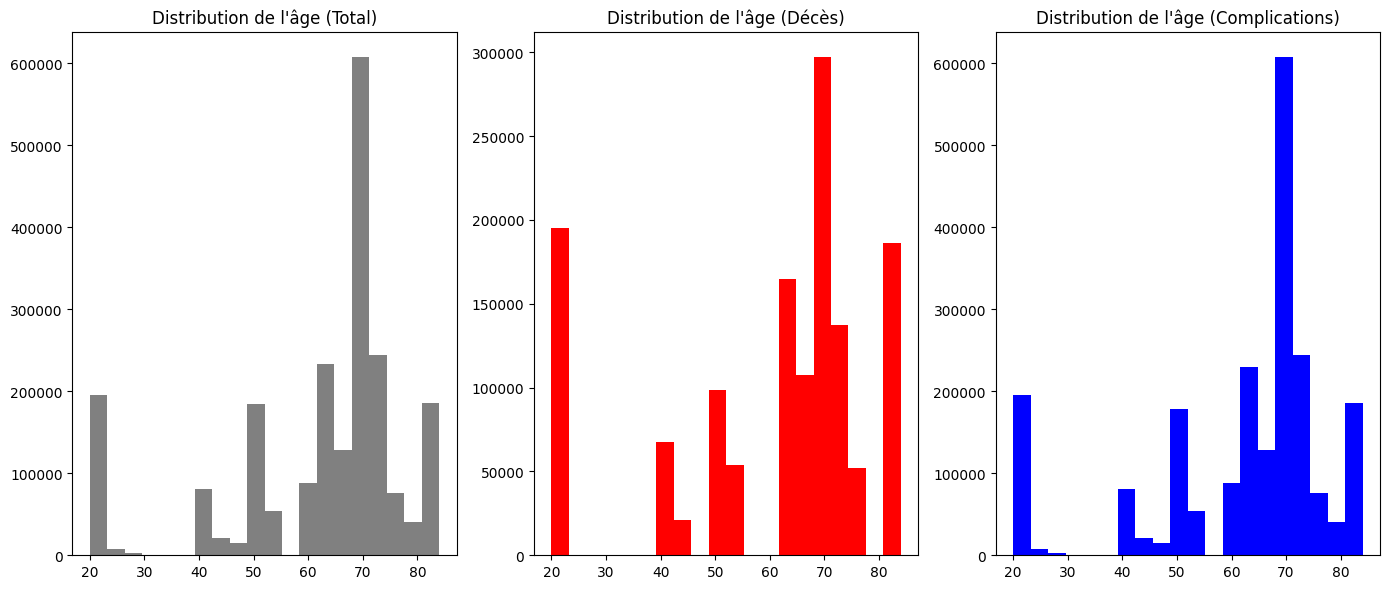

In [ ]:
import matplotlib.pyplot as plt

# Histogramme pour l'âge total, décès et complications
plt.figure(figsize=(14, 6))

# Histogramme pour l'âge total
plt.subplot(1, 3, 1)
plt.hist(df_filtered['age_at_admission'], bins=20, color='gray')
plt.title('Distribution de l\'âge (Total)')

# Histogramme pour l'âge des décédés
plt.subplot(1, 3, 2)
plt.hist(decedes['age_at_admission'], bins=20, color='red')
plt.title('Distribution de l\'âge (Décès)')

# Histogramme pour l'âge des complications
plt.subplot(1, 3, 3)
plt.hist(avec_complications['age_at_admission'], bins=20, color='blue')
plt.title('Distribution de l\'âge (Complications)')

plt.tight_layout()
plt.show()


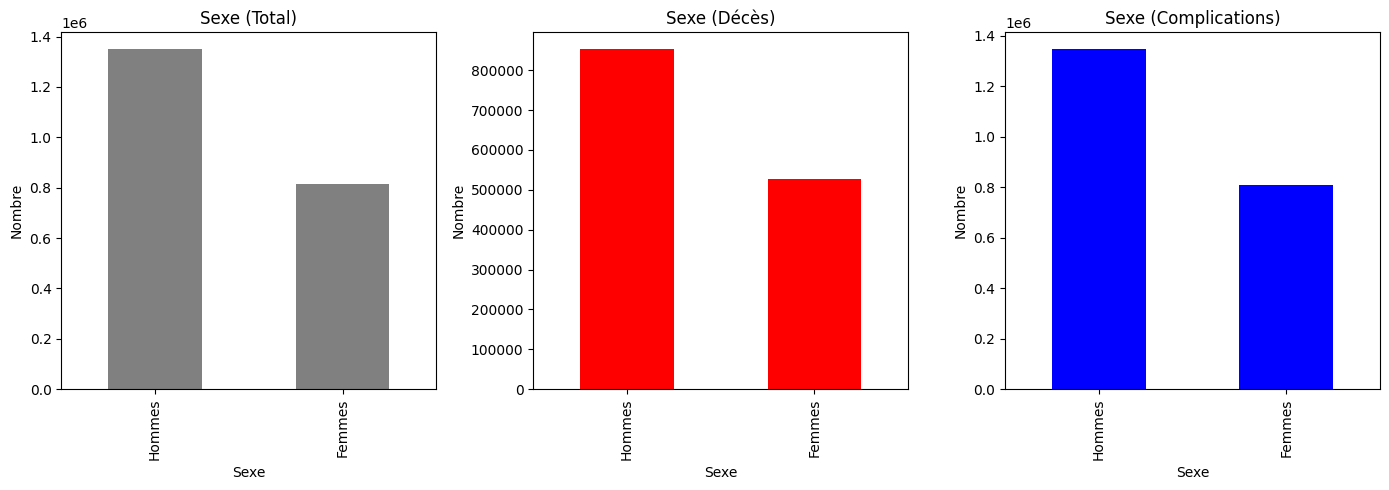

In [ ]:
# Comptage de sexe pour la population totale, décès et complications
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

df_filtered['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Sexe (Total)', color='gray')
decedes['gender'].value_counts().plot(kind='bar', ax=axes[1], title='Sexe (Décès)', color='red')
avec_complications['gender'].value_counts().plot(kind='bar', ax=axes[2], title='Sexe (Complications)', color='blue')

# Définir les étiquettes
for ax in axes:
    ax.set_xlabel('Sexe')
    ax.set_ylabel('Nombre')
    ax.set_xticklabels(['Hommes', 'Femmes'])

plt.tight_layout()
plt.show()


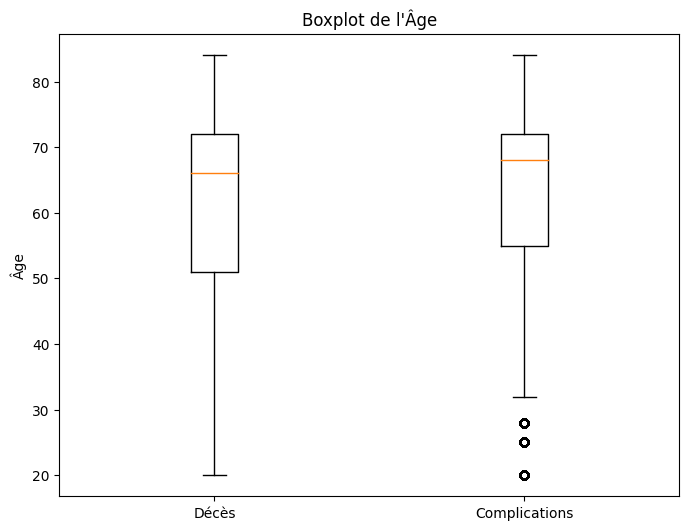

In [ ]:
# Boxplot pour l'âge des patients décédés et ceux avec complications
plt.figure(figsize=(8, 6))
plt.boxplot([decedes['age_at_admission'].dropna(), avec_complications['age_at_admission'].dropna()], labels=['Décès', 'Complications'])
plt.title('Boxplot de l\'Âge')
plt.ylabel('Âge')
plt.show()


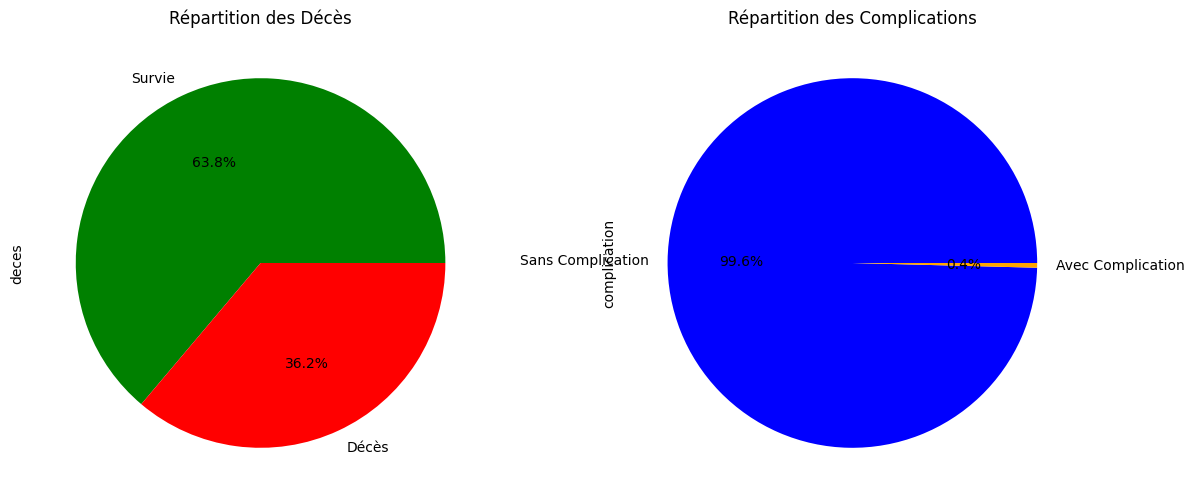

In [ ]:
# Pourcentage de décès et de survie
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df_filtered['deces'].value_counts().plot(kind='pie', labels=['Survie', 'Décès'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Répartition des Décès')

# Pourcentage de complications
plt.subplot(1, 2, 2)
df_filtered['complication'].value_counts().plot(kind='pie', labels=['Sans Complication', 'Avec Complication'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Répartition des Complications')

plt.show()


#Analyses Multivariées
Nous souhaitons effectuer une régression logistique multivariée pour prédire un événement binaire (par exemple, arrêt cardiaque oui/non).